### Data Exploratory Analysis :
* **Importing necessary libraries**
* **Loading the original data**
* **Basic checks**
* **Exploratory Data Analysis**
    * ***Univariate Analysis***
    * ***Bivariate Analysis of Continuous Variables vs Performance Rating***
    * ***Bivariate Analysis of Categorical Variables vs Performance Rating***
    * ***Multivariate Analysis***
* **Department-wise performances Analysis**    

#### Importing necessary libraries

In [22]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import sweetviz as sv

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading the original data 

In [23]:
#Loading the data
file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
emp_performance = pd.read_excel(file_location)

#### Basic checks

In [24]:
emp_performance.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [25]:
emp_performance.shape

(1200, 28)

In [26]:
emp_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [27]:
# Descriptive statistics for numerical data
emp_performance.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [28]:
# Descriptive statistics for non-numerical data
emp_performance.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [29]:
# Check the total number of distinct values and create lists for categorical and numerical columns
numerical_features = []
categorical_features = []
for i in emp_performance.columns:
    if(emp_performance[i].nunique() < 10) | (i in (emp_performance.describe(include='O').columns)):
        categorical_features.append(i)
        print(f'{i} - {emp_performance[i].nunique()} Distinct values - Categorical')
    else:
        numerical_features.append(i)
        print(f'{i} - {emp_performance[i].nunique()} Distinct values - Numerical')

EmpNumber - 1200 Distinct values - Categorical
Age - 43 Distinct values - Numerical
Gender - 2 Distinct values - Categorical
EducationBackground - 6 Distinct values - Categorical
MaritalStatus - 3 Distinct values - Categorical
EmpDepartment - 6 Distinct values - Categorical
EmpJobRole - 19 Distinct values - Categorical
BusinessTravelFrequency - 3 Distinct values - Categorical
DistanceFromHome - 29 Distinct values - Numerical
EmpEducationLevel - 5 Distinct values - Categorical
EmpEnvironmentSatisfaction - 4 Distinct values - Categorical
EmpHourlyRate - 71 Distinct values - Numerical
EmpJobInvolvement - 4 Distinct values - Categorical
EmpJobLevel - 5 Distinct values - Categorical
EmpJobSatisfaction - 4 Distinct values - Categorical
NumCompaniesWorked - 10 Distinct values - Numerical
OverTime - 2 Distinct values - Categorical
EmpLastSalaryHikePercent - 15 Distinct values - Numerical
EmpRelationshipSatisfaction - 4 Distinct values - Categorical
TotalWorkExperienceInYears - 40 Distinct valu

In [30]:
emp_performance.TrainingTimesLastYear.unique()

array([2, 1, 4, 5, 6, 3, 0], dtype=int64)

In [31]:
print(f'{len(categorical_features)} Categorical Features:\n {categorical_features} \n\n {len(numerical_features)} Numerical Features:\n {numerical_features}')

18 Categorical Features:
 ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'OverTime', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'Attrition', 'PerformanceRating'] 

 10 Numerical Features:
 ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Observations:
* We have data for 1200 employees with 28 features
* There are no missing values in the provided dataset
* These are categorical features which are numerical:  
    PerformanceRating,EmpWorkLifeBalance,TrainingTimesLastYear,EmpRelationshipSatisfaction, EmpJobSatisfaction, EmpJobLevel,EmpJobInvolvement,EmpEnvironmentSatisfaction,EmpEducationLevel
* We have 18 Categorical Features and 10 Numerical Features. 
* High Cardinality Categorical features : EmpNumber with 1200 distinct values.
* Nominal Categorical features : Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole,BusinessTravelFrequency
* Ordinal Categorical features : EmpEducationLevel, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, OverTime, EmpRelationshipSatisfaction, TrainingTimesLastYear, EmpWorkLifeBalance, Attrition,PerformanceRating
* TrainingTimesLastYear is actually a numerical feature but as there are only 7 distinct values from 0 to 6 for 1200 employees, so this is considered as categorical feature

#### Exploratory Data Analysis 

###### Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


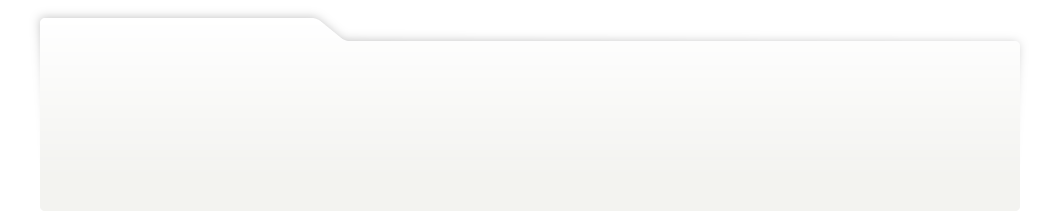
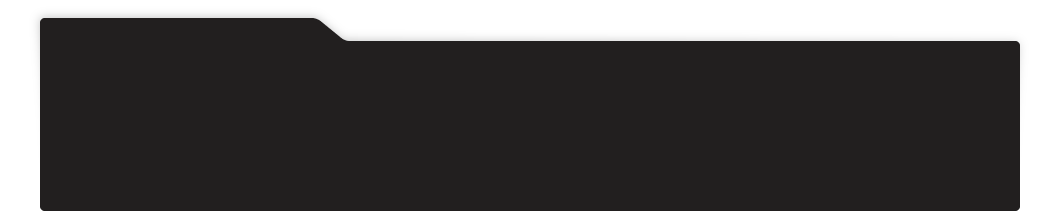
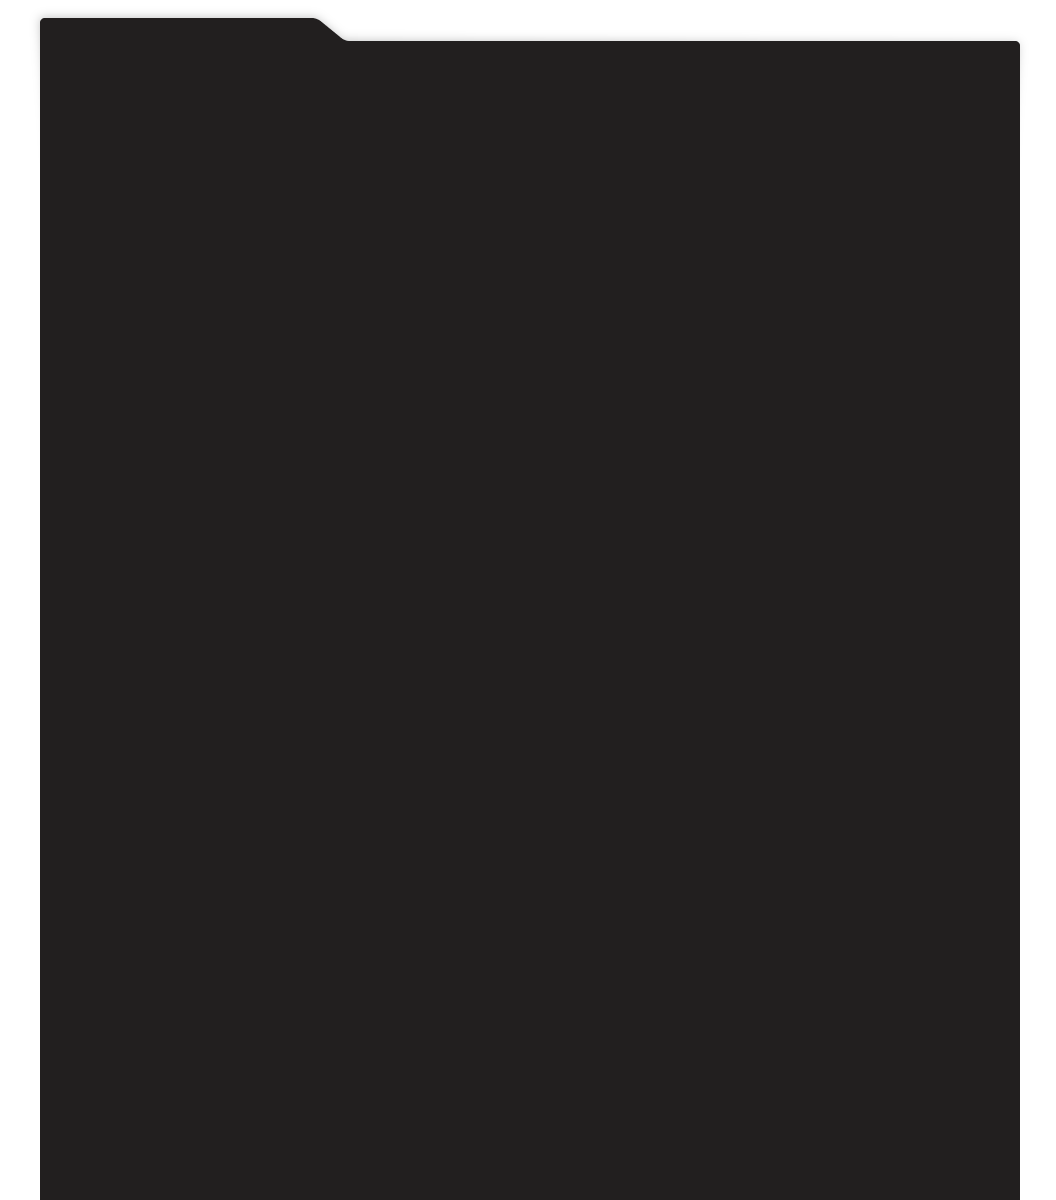
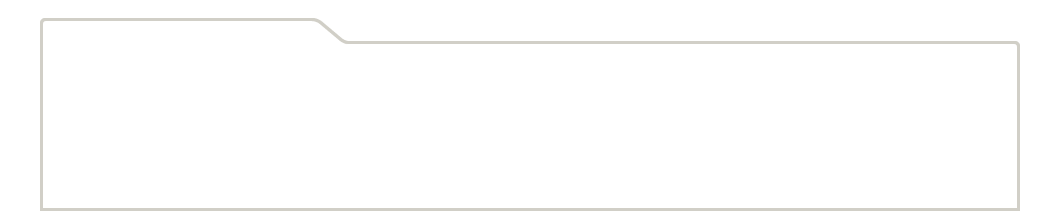
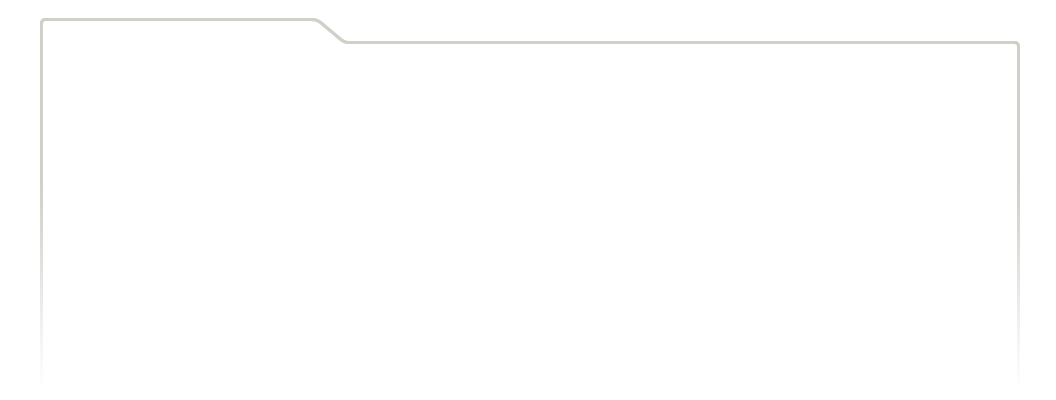
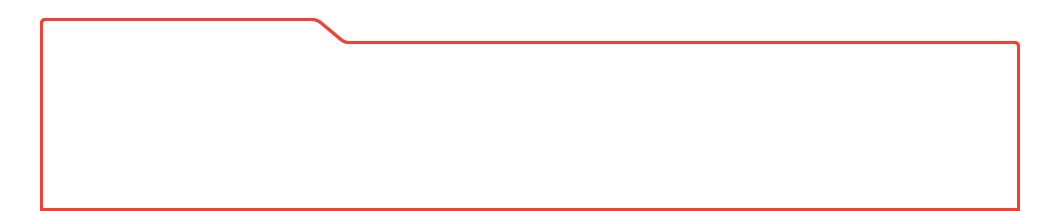
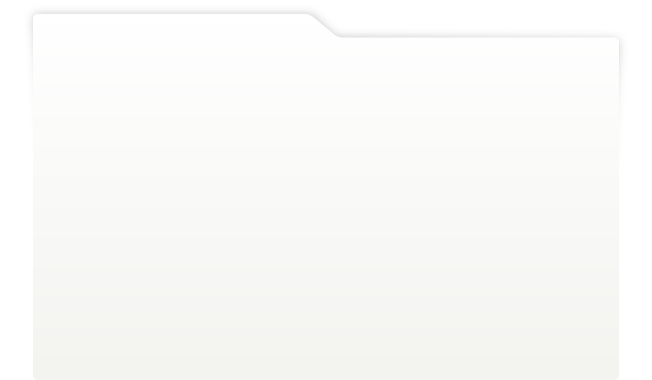
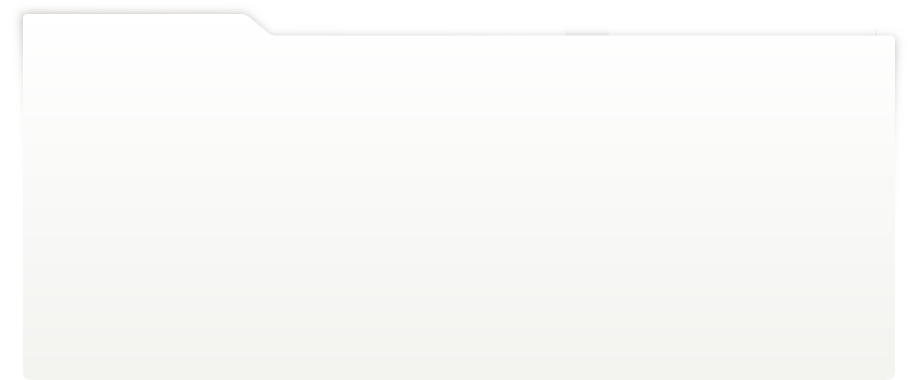
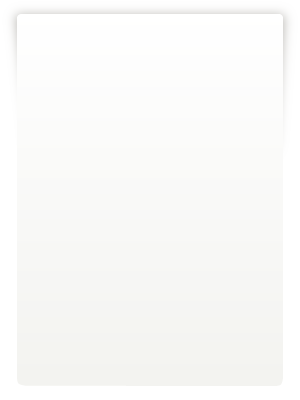
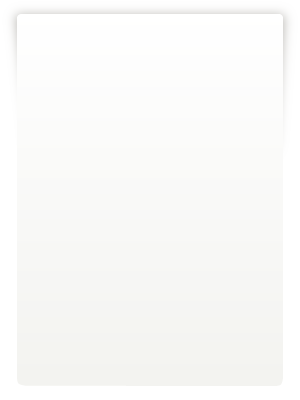
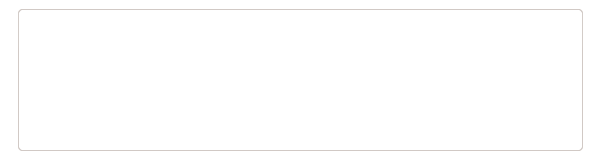
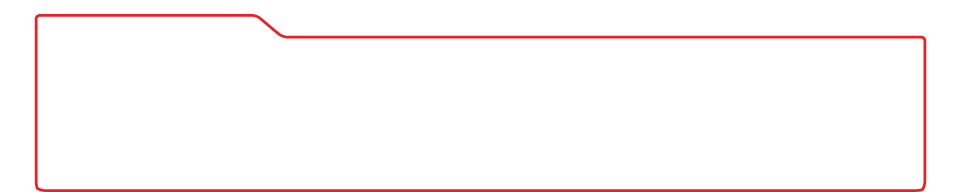
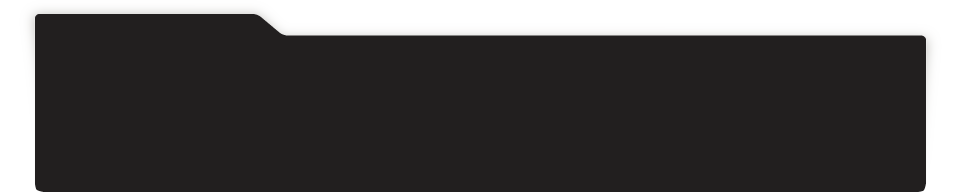
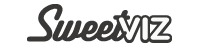
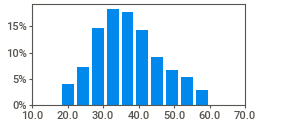
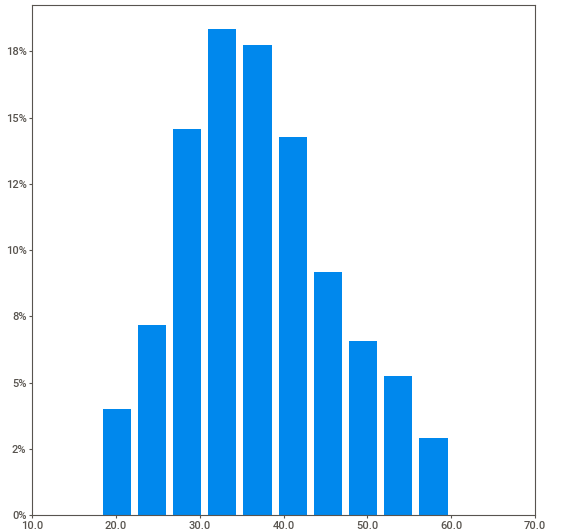
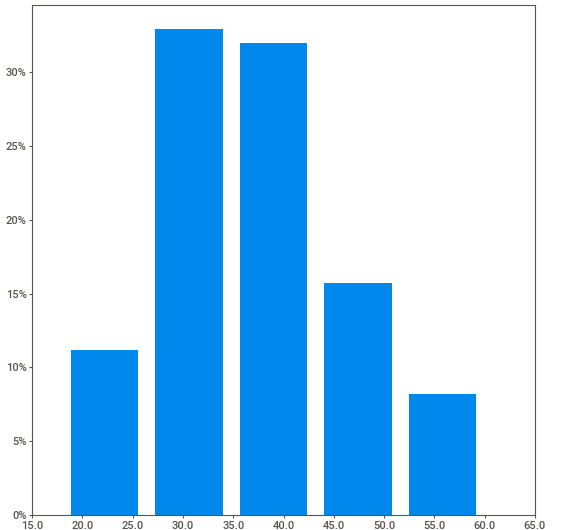
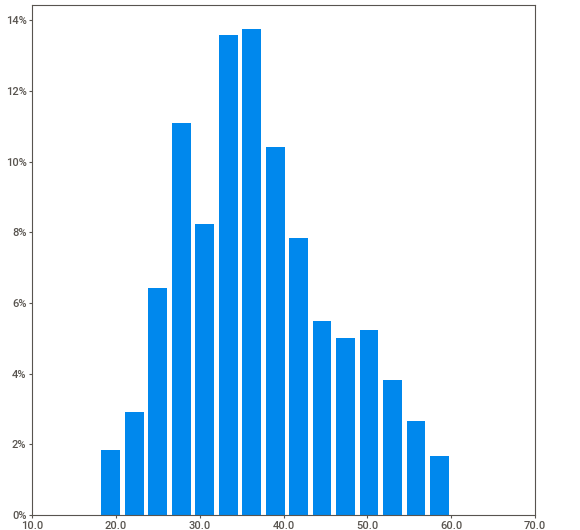
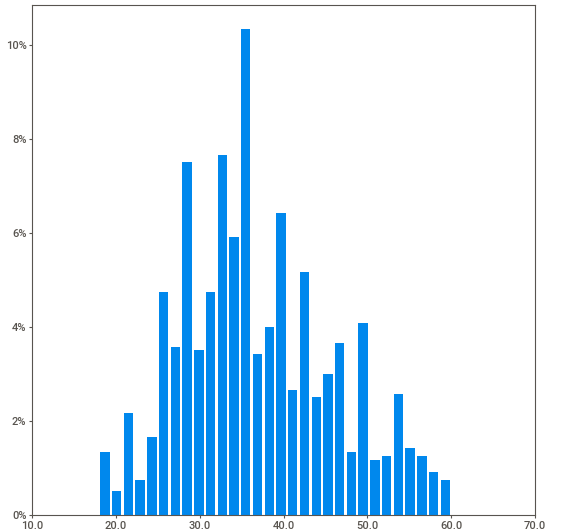
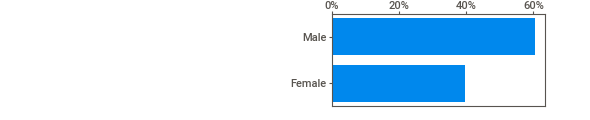
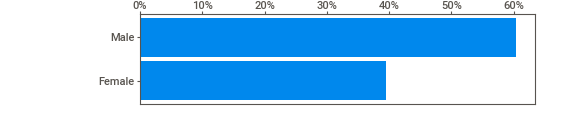
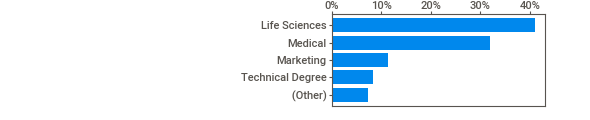
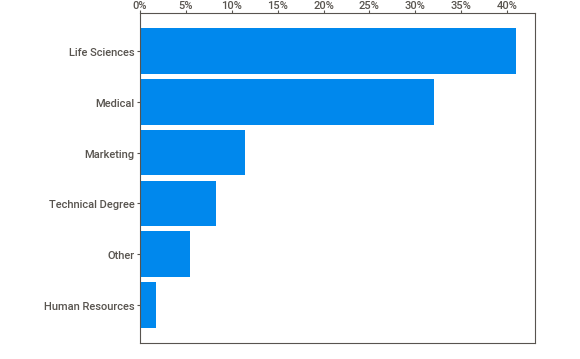
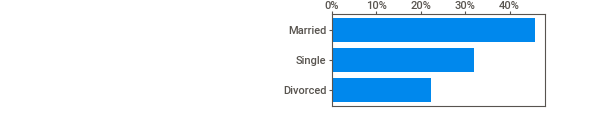
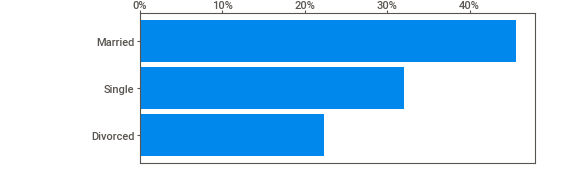
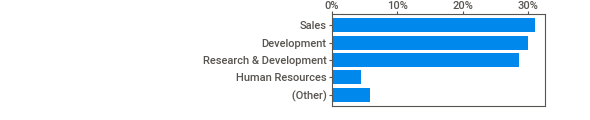
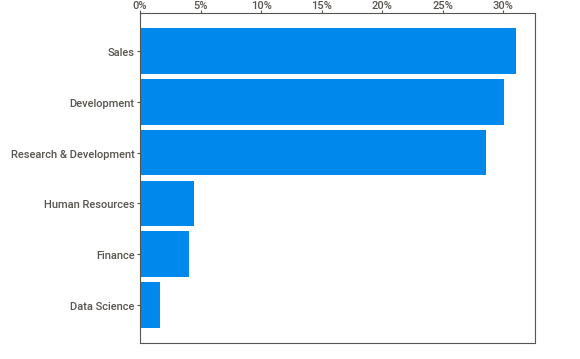
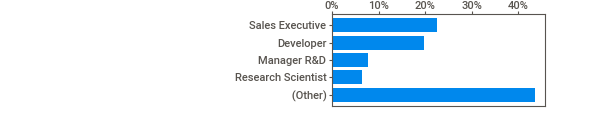
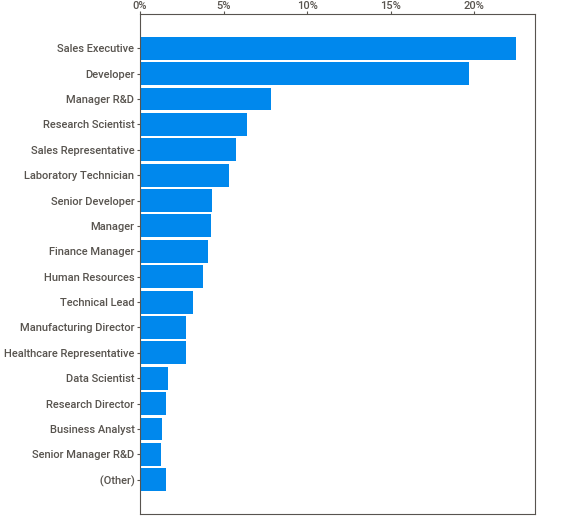
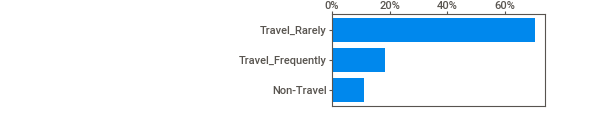
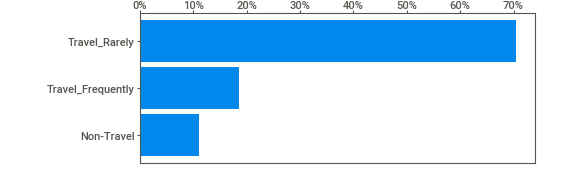
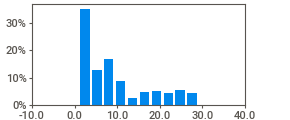
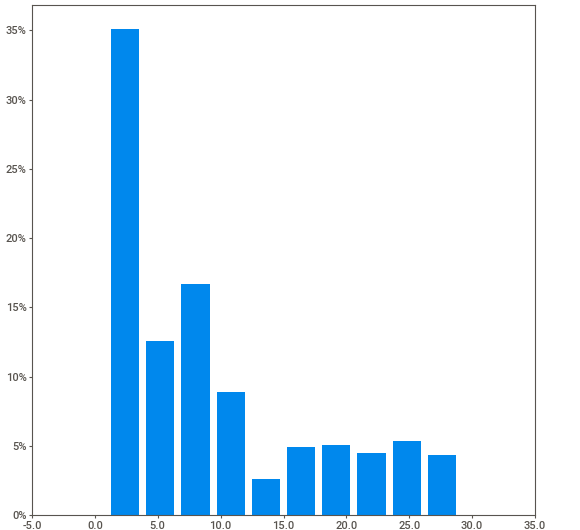
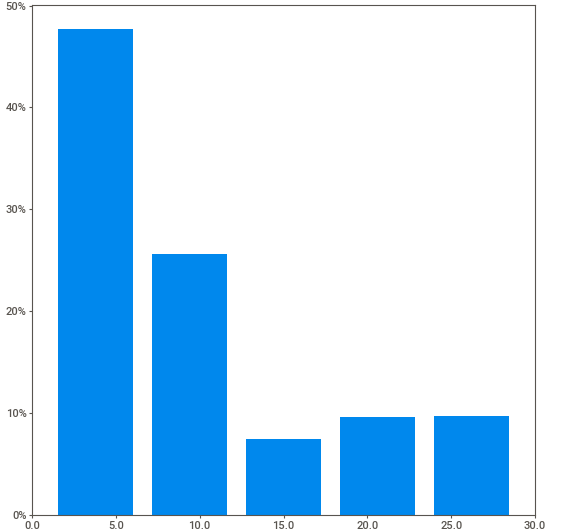
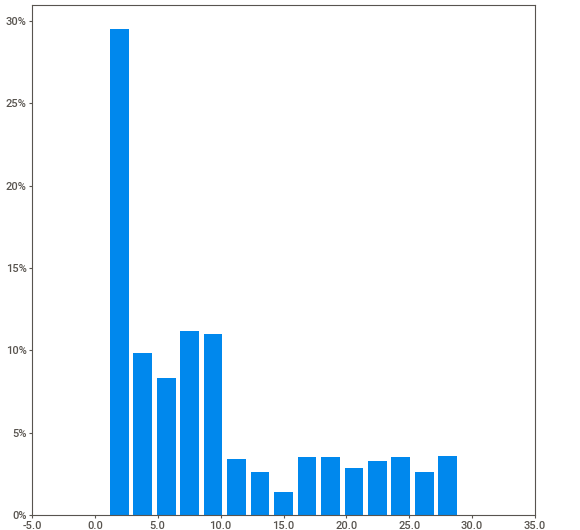
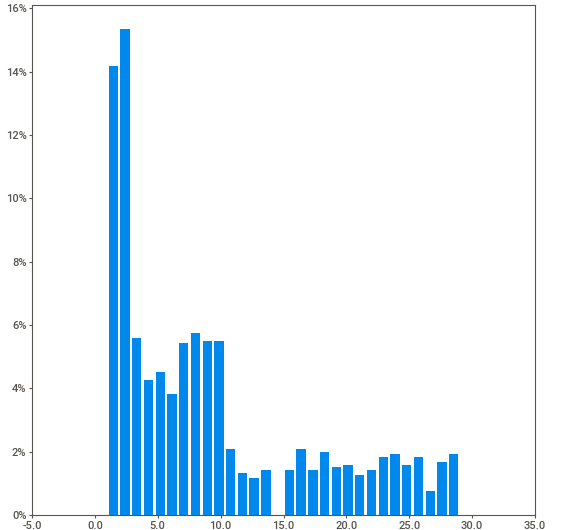
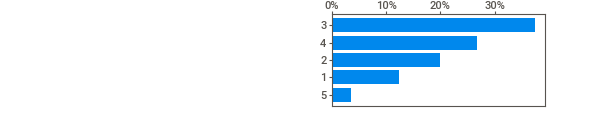
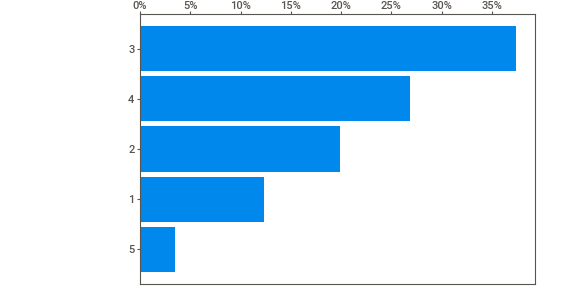
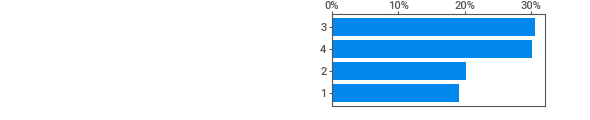
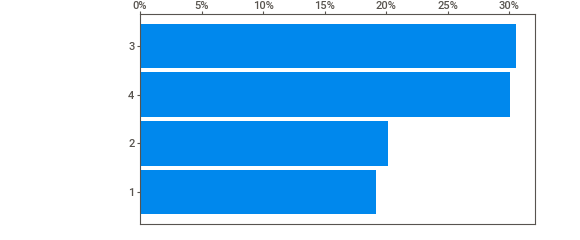
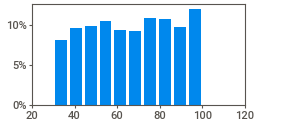
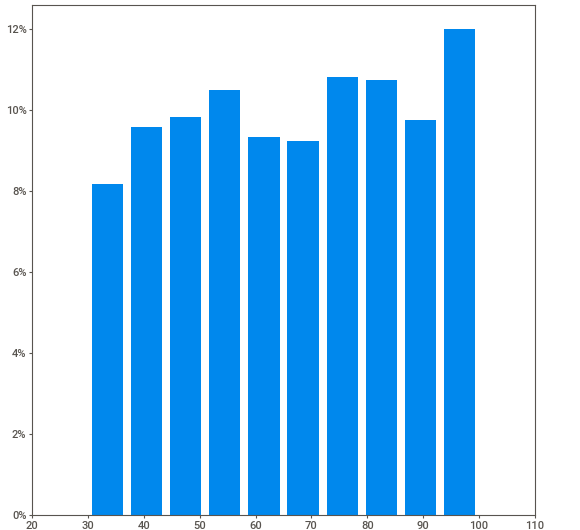
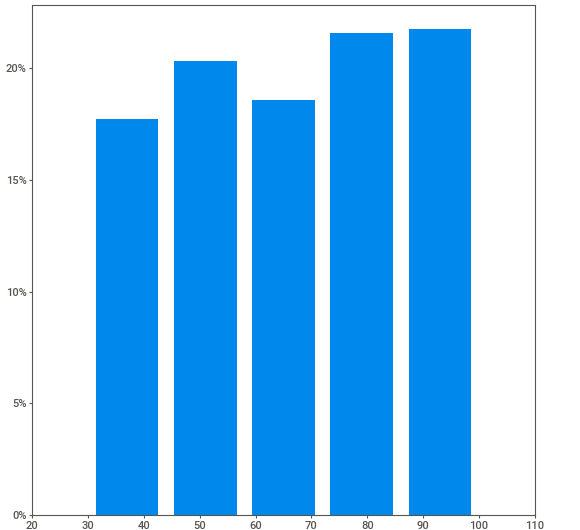
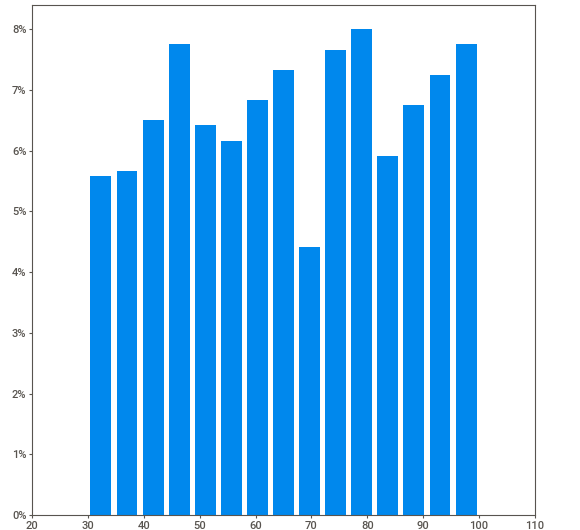
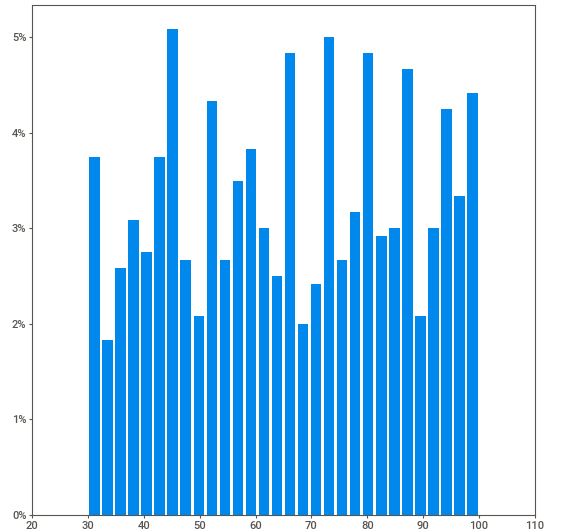
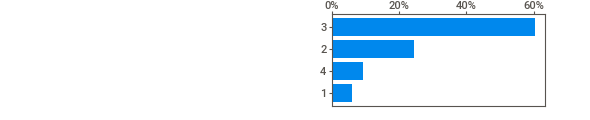
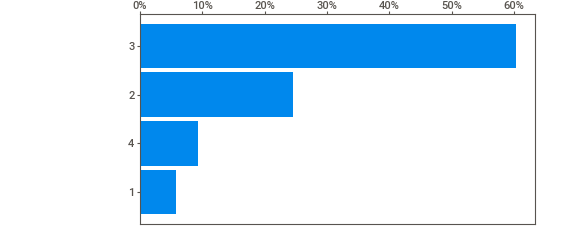
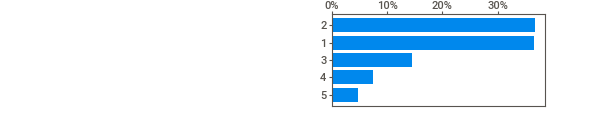
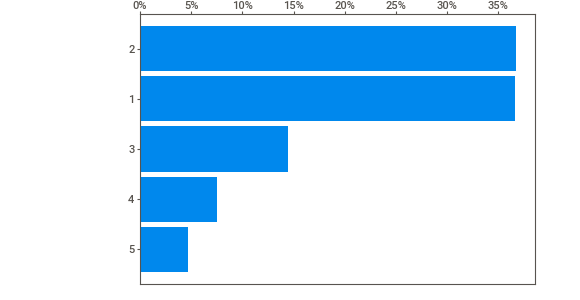
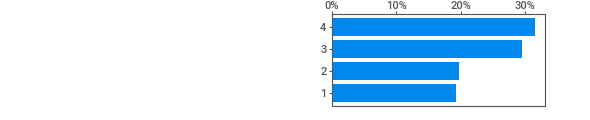
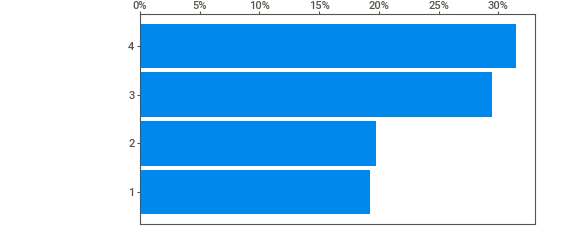
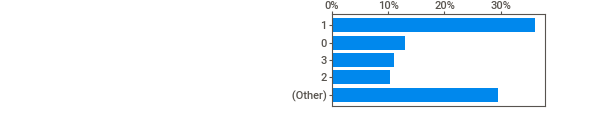
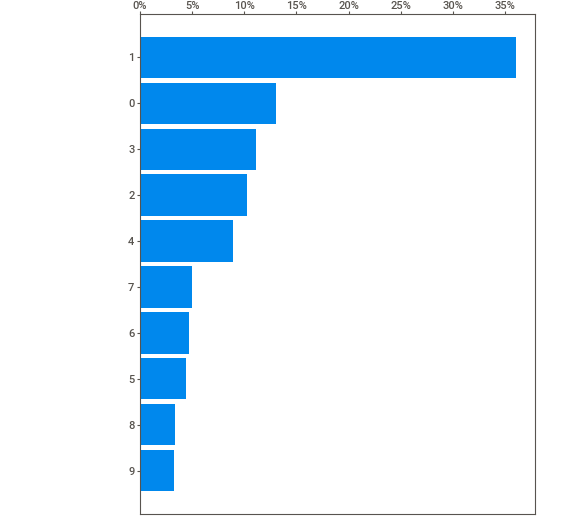
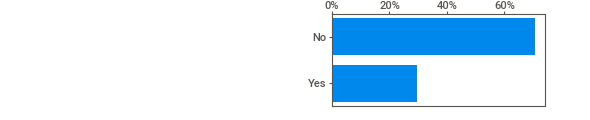
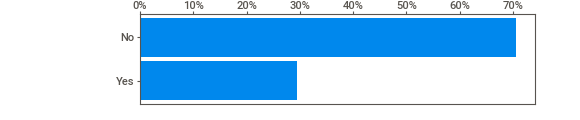
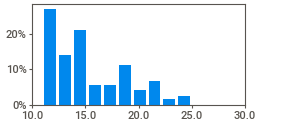
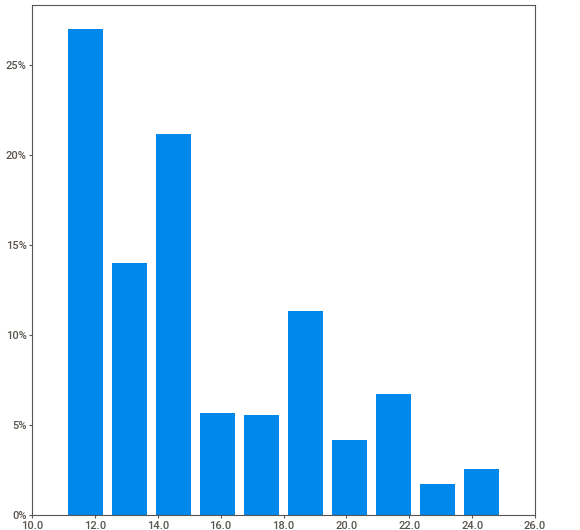
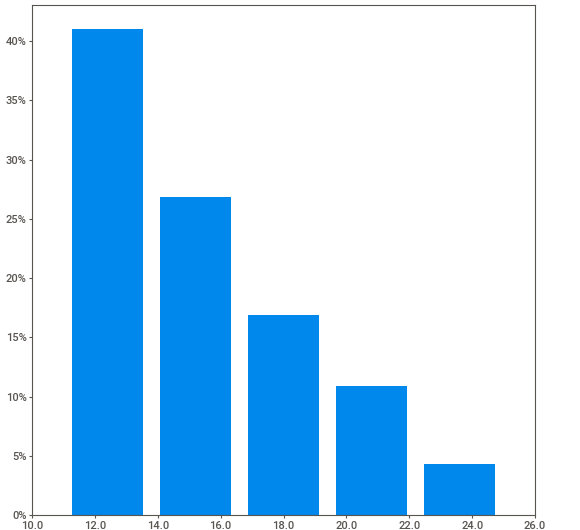
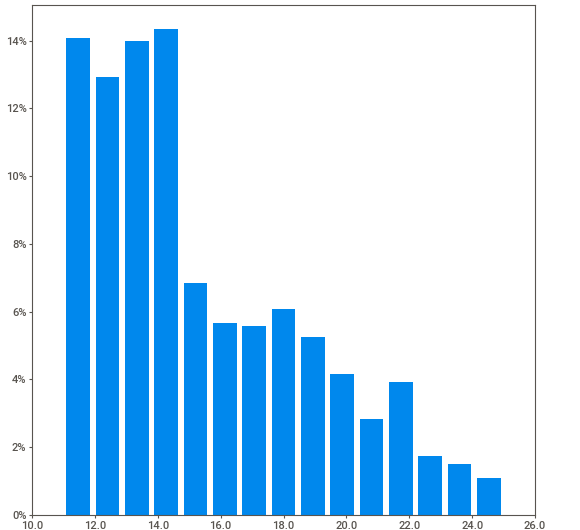
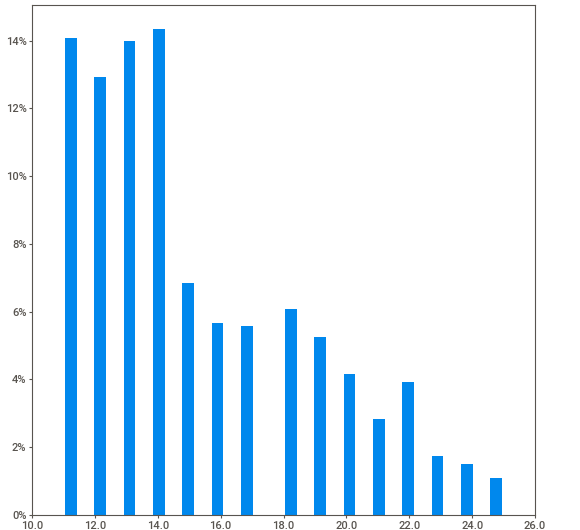
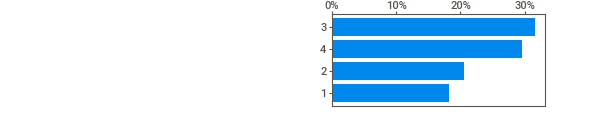
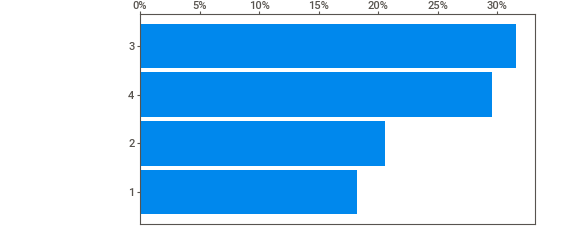
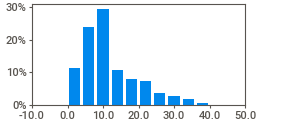
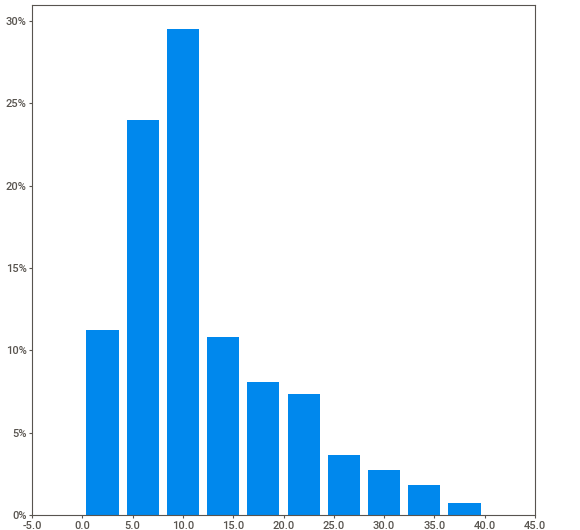
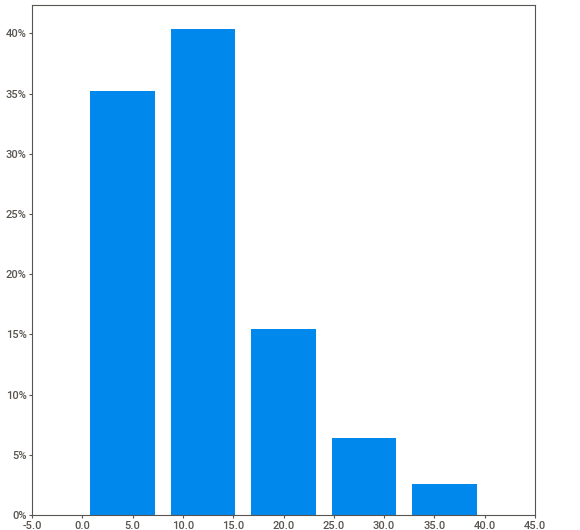
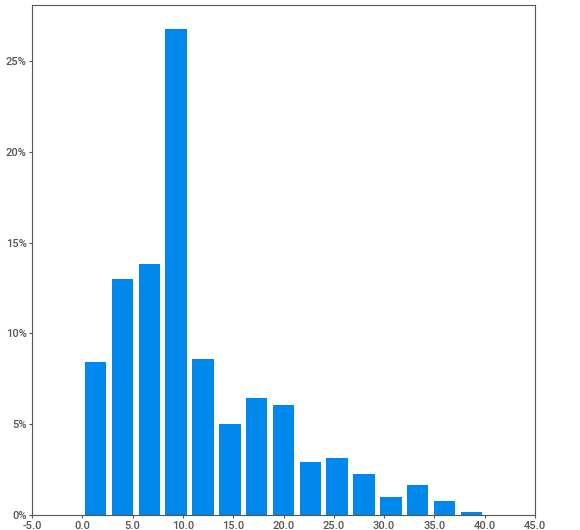
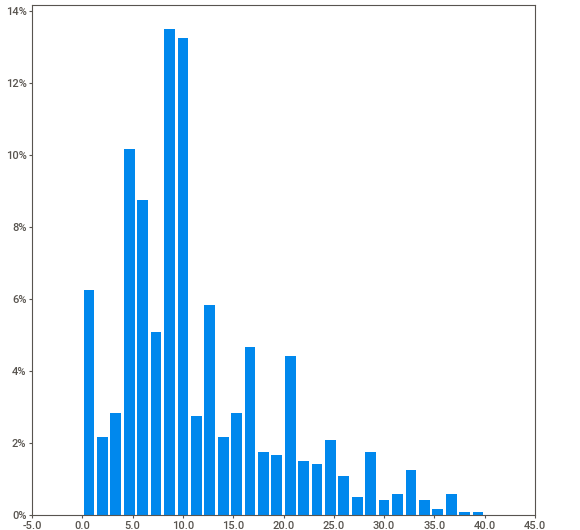
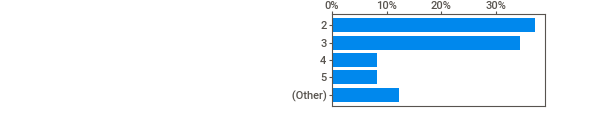
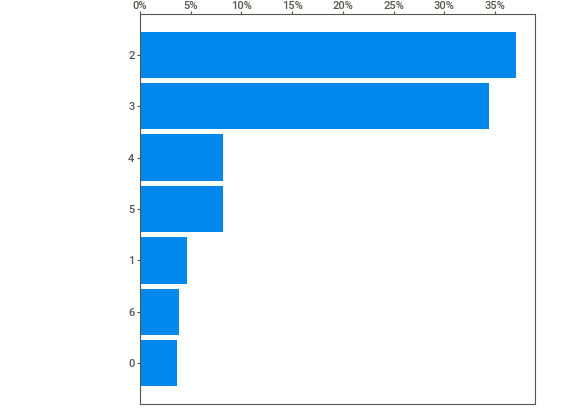
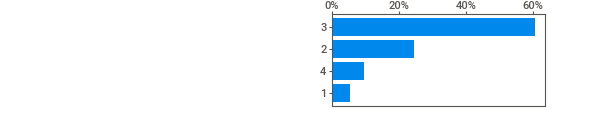
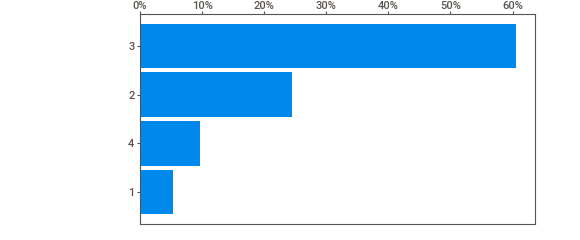
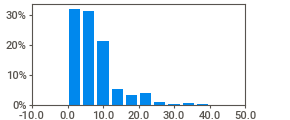
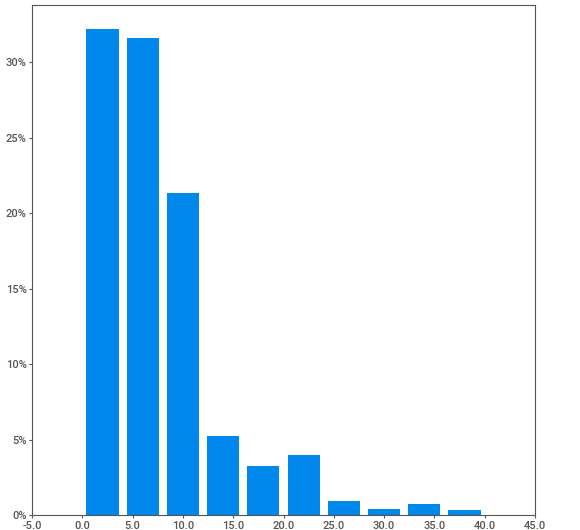
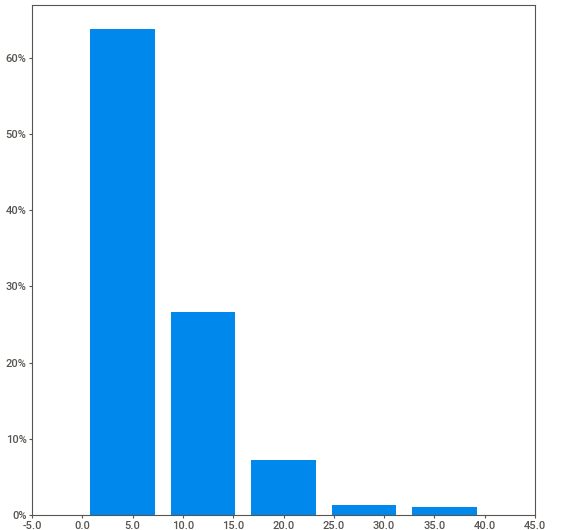
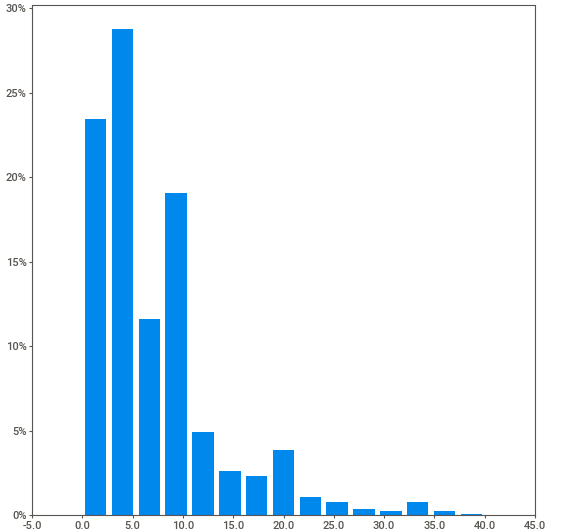
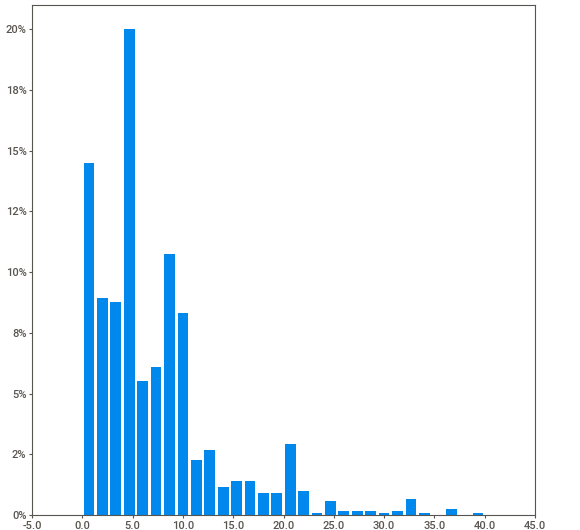
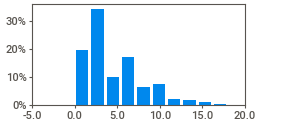
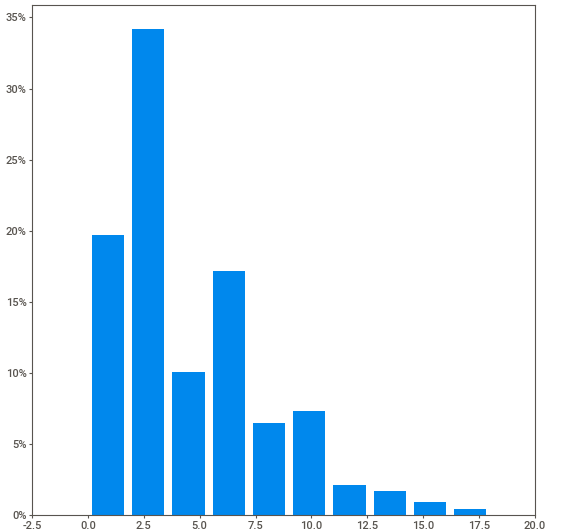
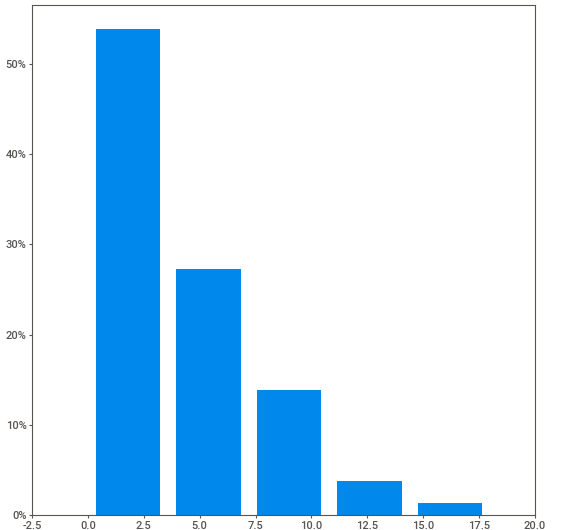
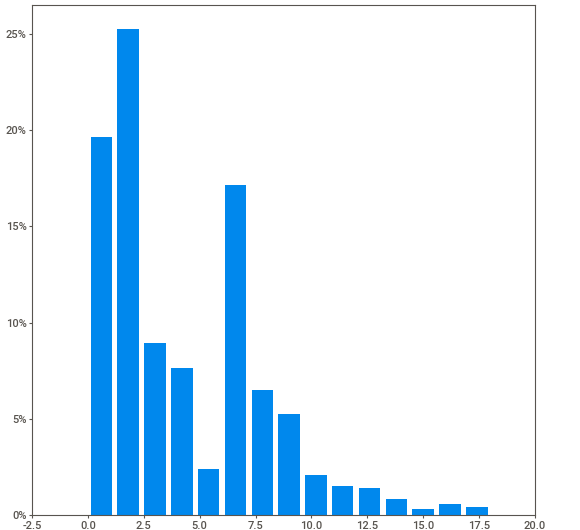
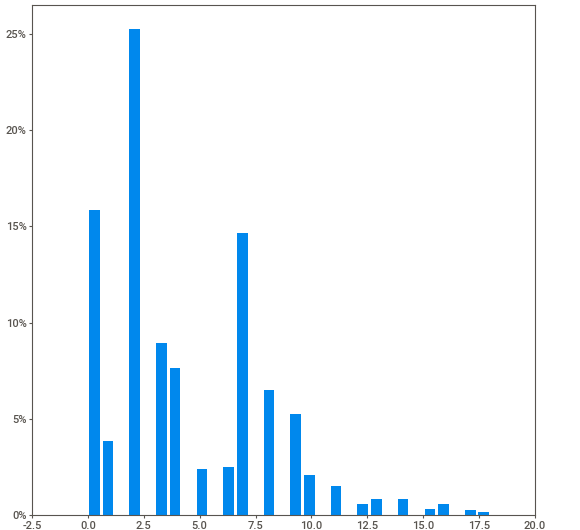
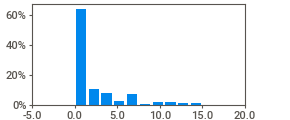
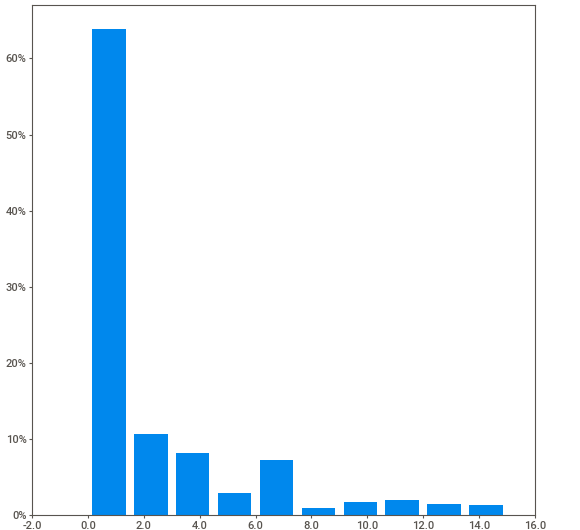
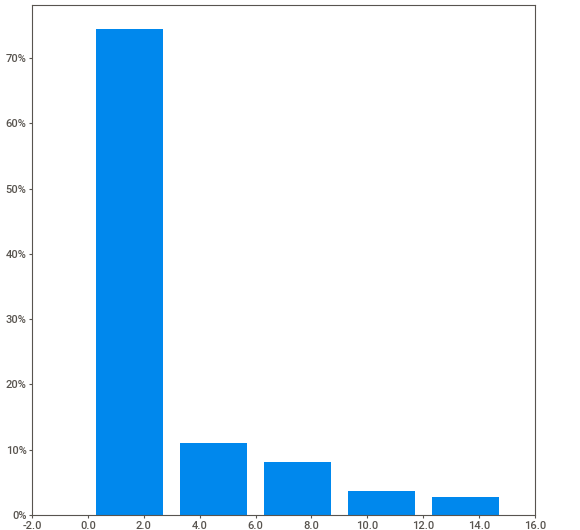
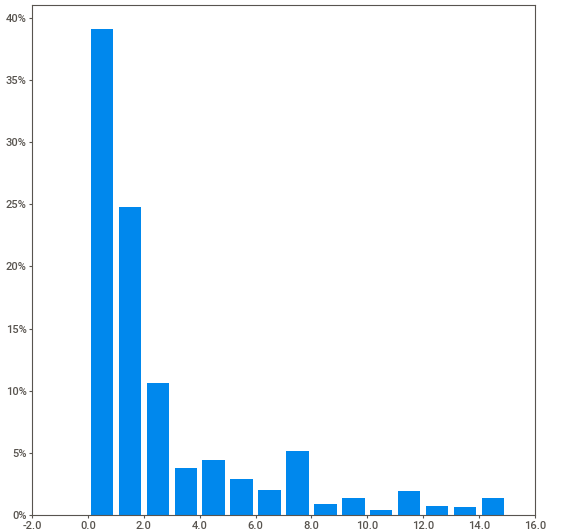
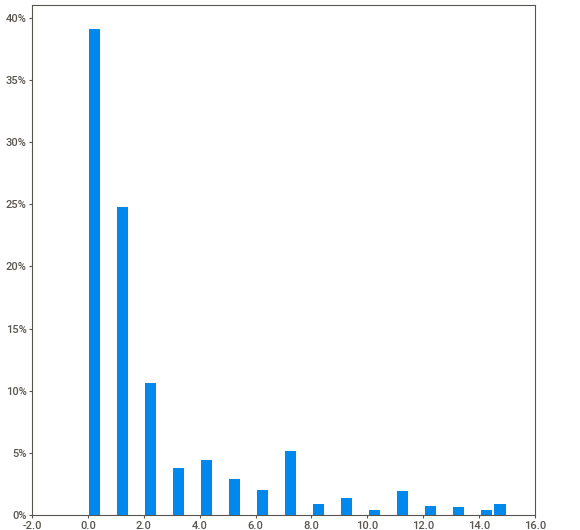
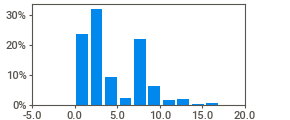
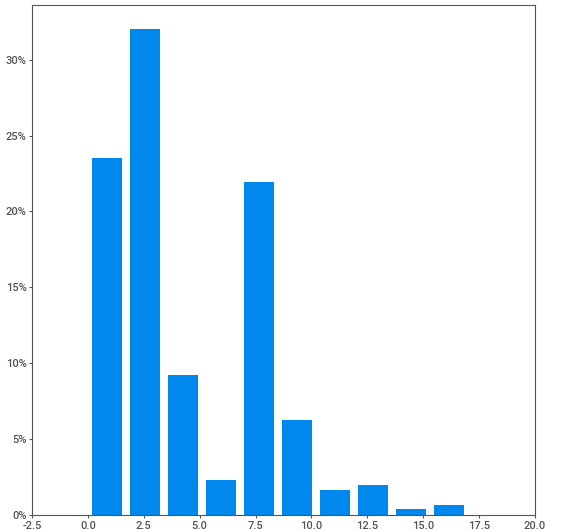
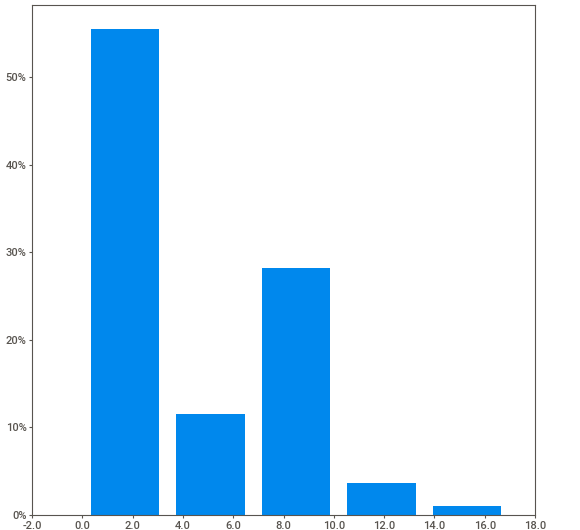
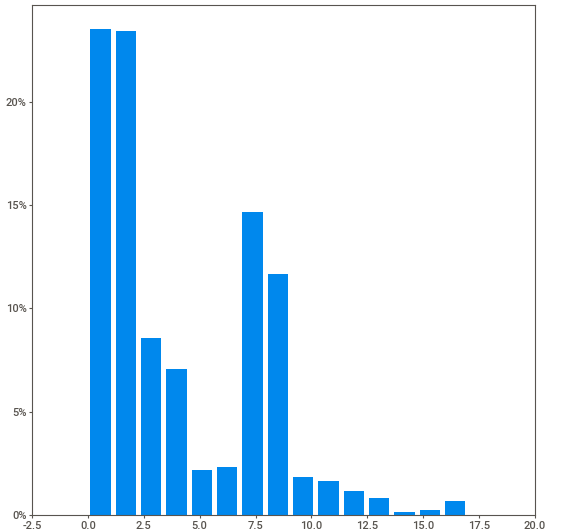
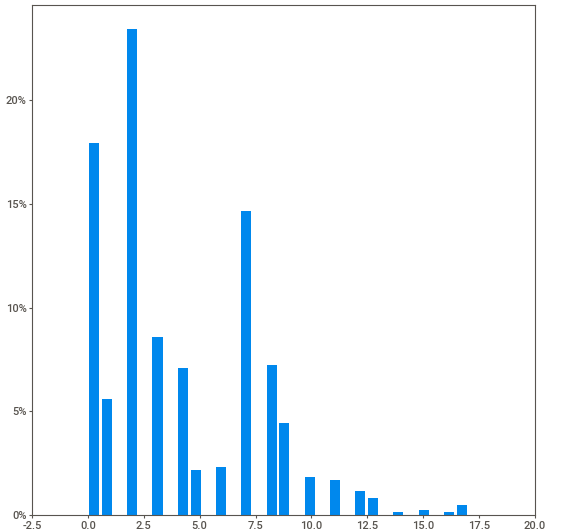
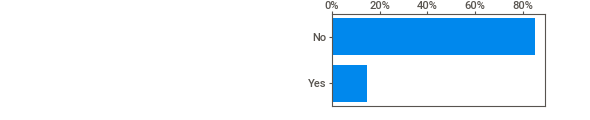
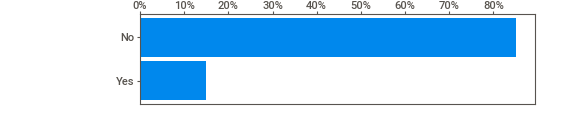
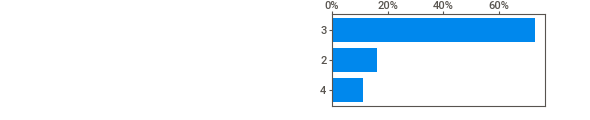
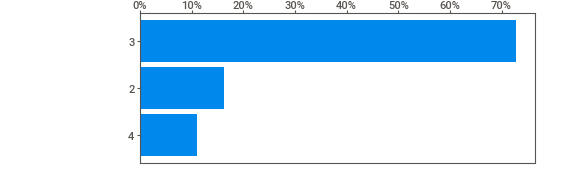
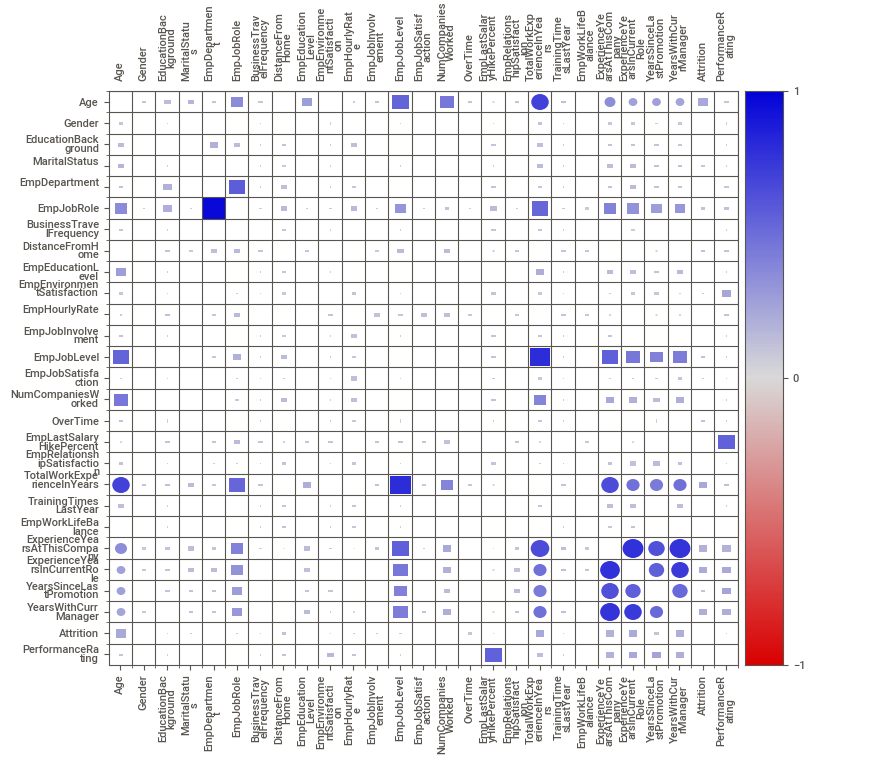
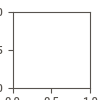

In [32]:
# Using Automated Library for Univariate Analysis
my_report = sv.analyze(emp_performance)
my_report.show_notebook()

<AxesSubplot:ylabel='PerformanceRating'>

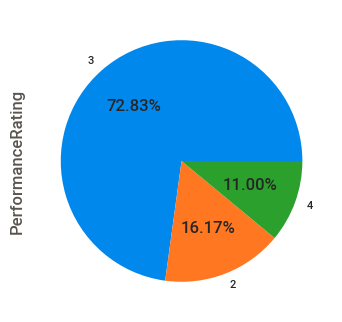

In [12]:
# Plotting pie chart to visualize the distribution of Performance Rating of the employees
emp_performance.PerformanceRating.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

***Univariate Analysis Observations***

*Visualization using automated library sweetviz*

* EmpNumber - Employee ID of the employee. This is a unique number that has been assigned to each and every employee, so we have 1200 distinct values.
* Age - Employees aged between 18 and 60 and this feature have normal distribution.
* Gender - There are more than 60% of Male employees in the company.
* EducationBackground - Around 40% employees are from Life Sciences educational background and 30% employees are from Medical EducationBackground.
* MaritalStatus - Around 40% Employees are married.
* EmpDepartment - Most of the employees are working in Sales, Development and Research & Development Department.
* EmpJobRole - Around 20% Sales Executives and  20% Developers working in the company.
* BusinessTravelFrequency - Around 60% of the employees travel rarely.
* DistanceFromHome - Around 30% of employees resider near office location, hence this feature have a positive skewed distribution.
* EmpEducationLevel - Around 50% of the employees educational level is more than 3.
* EmpEnvironmentSatisfaction - Around 60% employees are satisfied with their environment. (ie.)more than 3
* EmpHourlyRate - Hourly rate of the employees ranges from 30 to 100. 
* EmpJobInvolvement - Around 60% of employees Job involvement are greater than 3.
* EmpJobLevel - Around 70% of the employees working are in Job Level 1 and 2.
* EmpJobSatisfaction - Around 60% of the employees Job satisfaction rating is more than 3.
* NumCompaniesWorked - Around 10% of employees joined the company as freshers and more than 30% of employees working in this company as their second company.
* OverTime - Around 60% of employees don't work overtime.
* EmpLastSalaryHikePercent - Around 50% of the employees last salary hike was between 11% and 15%
* EmpRelationshipSatisfaction - Around 60% of employees are satisfied with relationship in the company.
* TotalWorkExperienceInYears - Around 60% of employees work experience is less than 10 years.
* TrainingTimesLastYear - Around 70% of the employees attended only 2 or 3 training times last year.
* EmpWorkLifeBalance - Around 60% of employees work life balance is more than 3.
* ExperienceYearsAtThisCompany - Around 40% of the employees are working more than 10 years in the company. 
* ExperienceYearsInCurrentRole - Around 40% of the employees are working in the current role for more than 5 years.
* YearsSinceLastPromotion - Around 60% of employees were promoted last year.
* YearsWithCurrManager - Around 40% of employees are working with their current manager for more than 5 years.
* Attrition - Less than 20% employees have the possibility of leaving the company.
* PerformanceRating - Around 70% of the employees performance rating is 3.

###### Bivariate Analysis of Continuous Variables vs Performance Rating

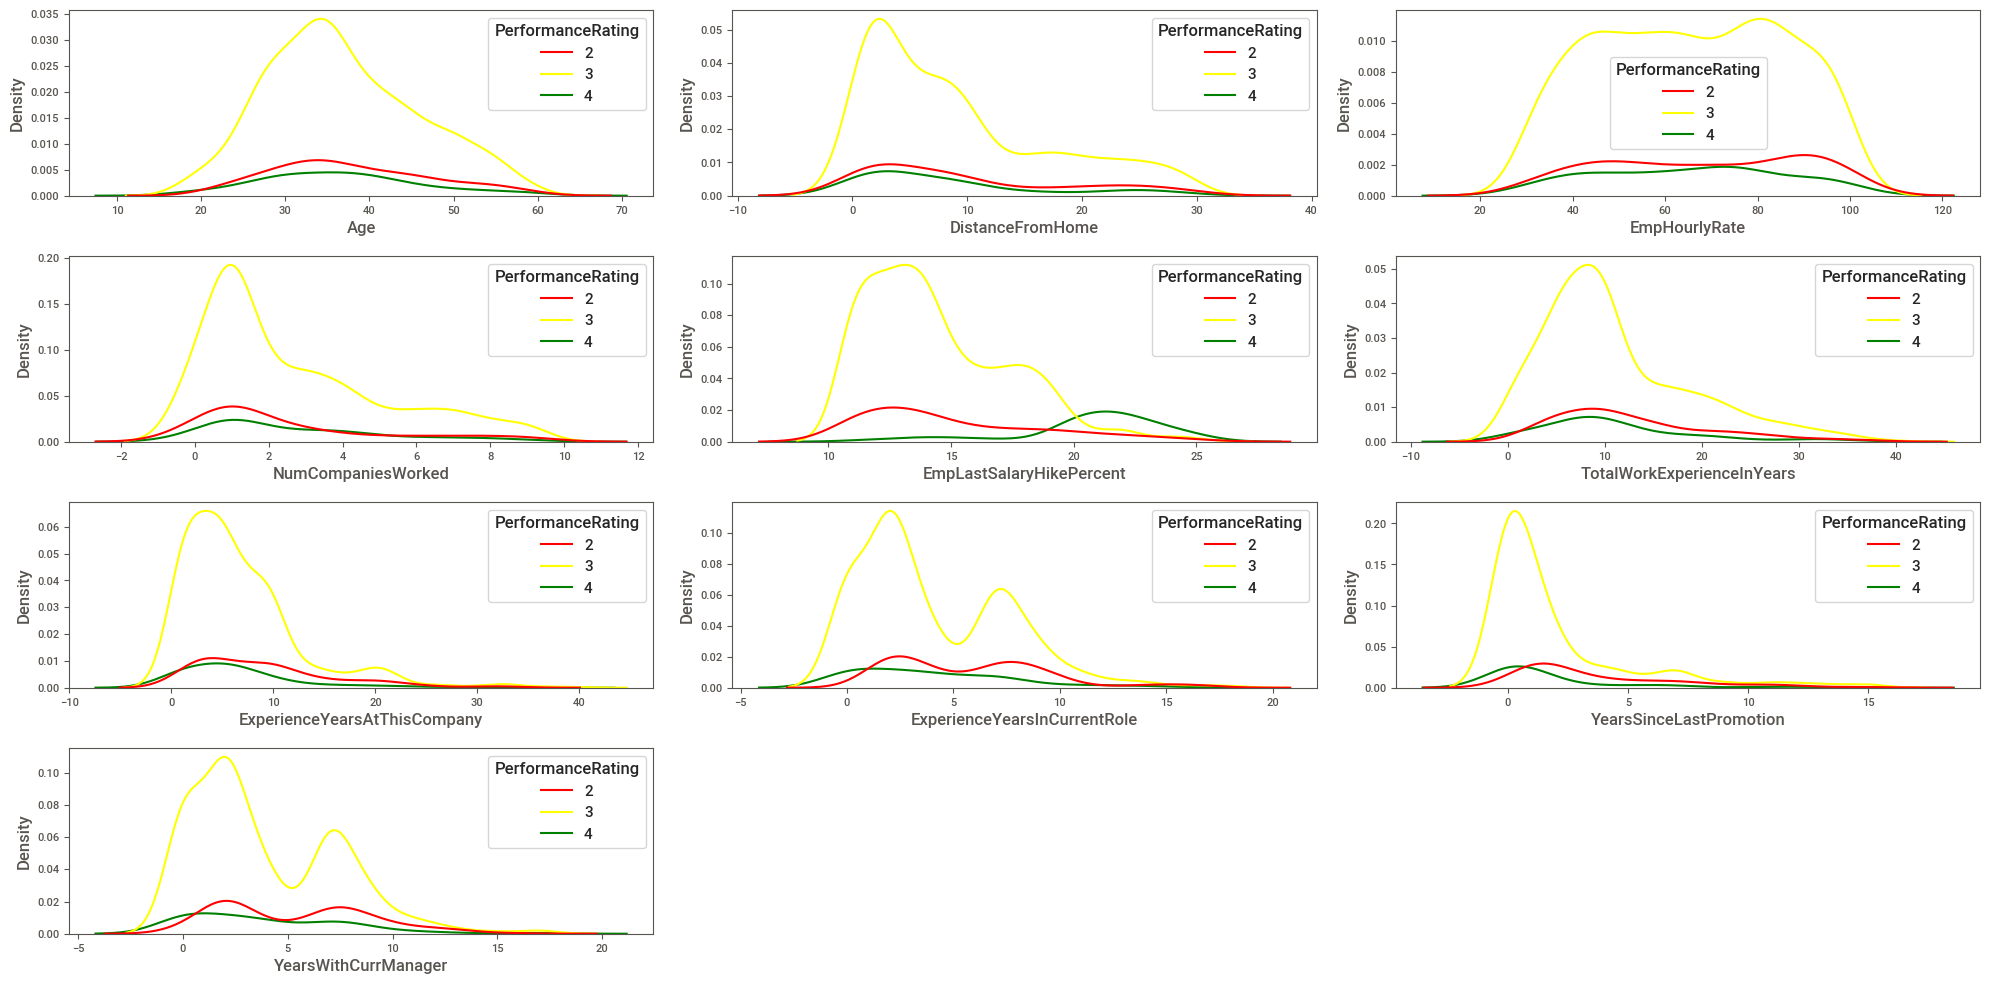

In [13]:
# Plotting kdeplot to see how the distribution of variables behaves separately with respect to each PerformanceRating
fig = plt.figure(figsize=(20,10))
plotnumb = 1
for col in numerical_features:
    ax = plt.subplot(4,3,plotnumb)
    sns.kdeplot(emp_performance[col],hue=emp_performance.PerformanceRating,palette={2 : 'Red', 3 :'Yellow',4 : 'Green'})
    plotnumb += 1
plt.tight_layout()

***Bivariate Analysis of Continuous Variables vs Performance Rating Observations***

*Visualization using Matplotlib and Seaborn*

* When DistancefromHome increases, the performance of the employees are decreasing.
* When NumCompaniesWorked increases, the performance of the employees are decreasing.
* When EmpLastSalaryHikePercent increases, the performance of the employees are increasing.
* Performance of the employees decreases gradually as experience increases at the company.
* Performance of the employees decreases, when Employees are in the current role for many years.
* Performance of the employees decreases, when current manager is not changed for too many years.

###### Bivariate Analysis of Categorical Variables vs Performance Rating

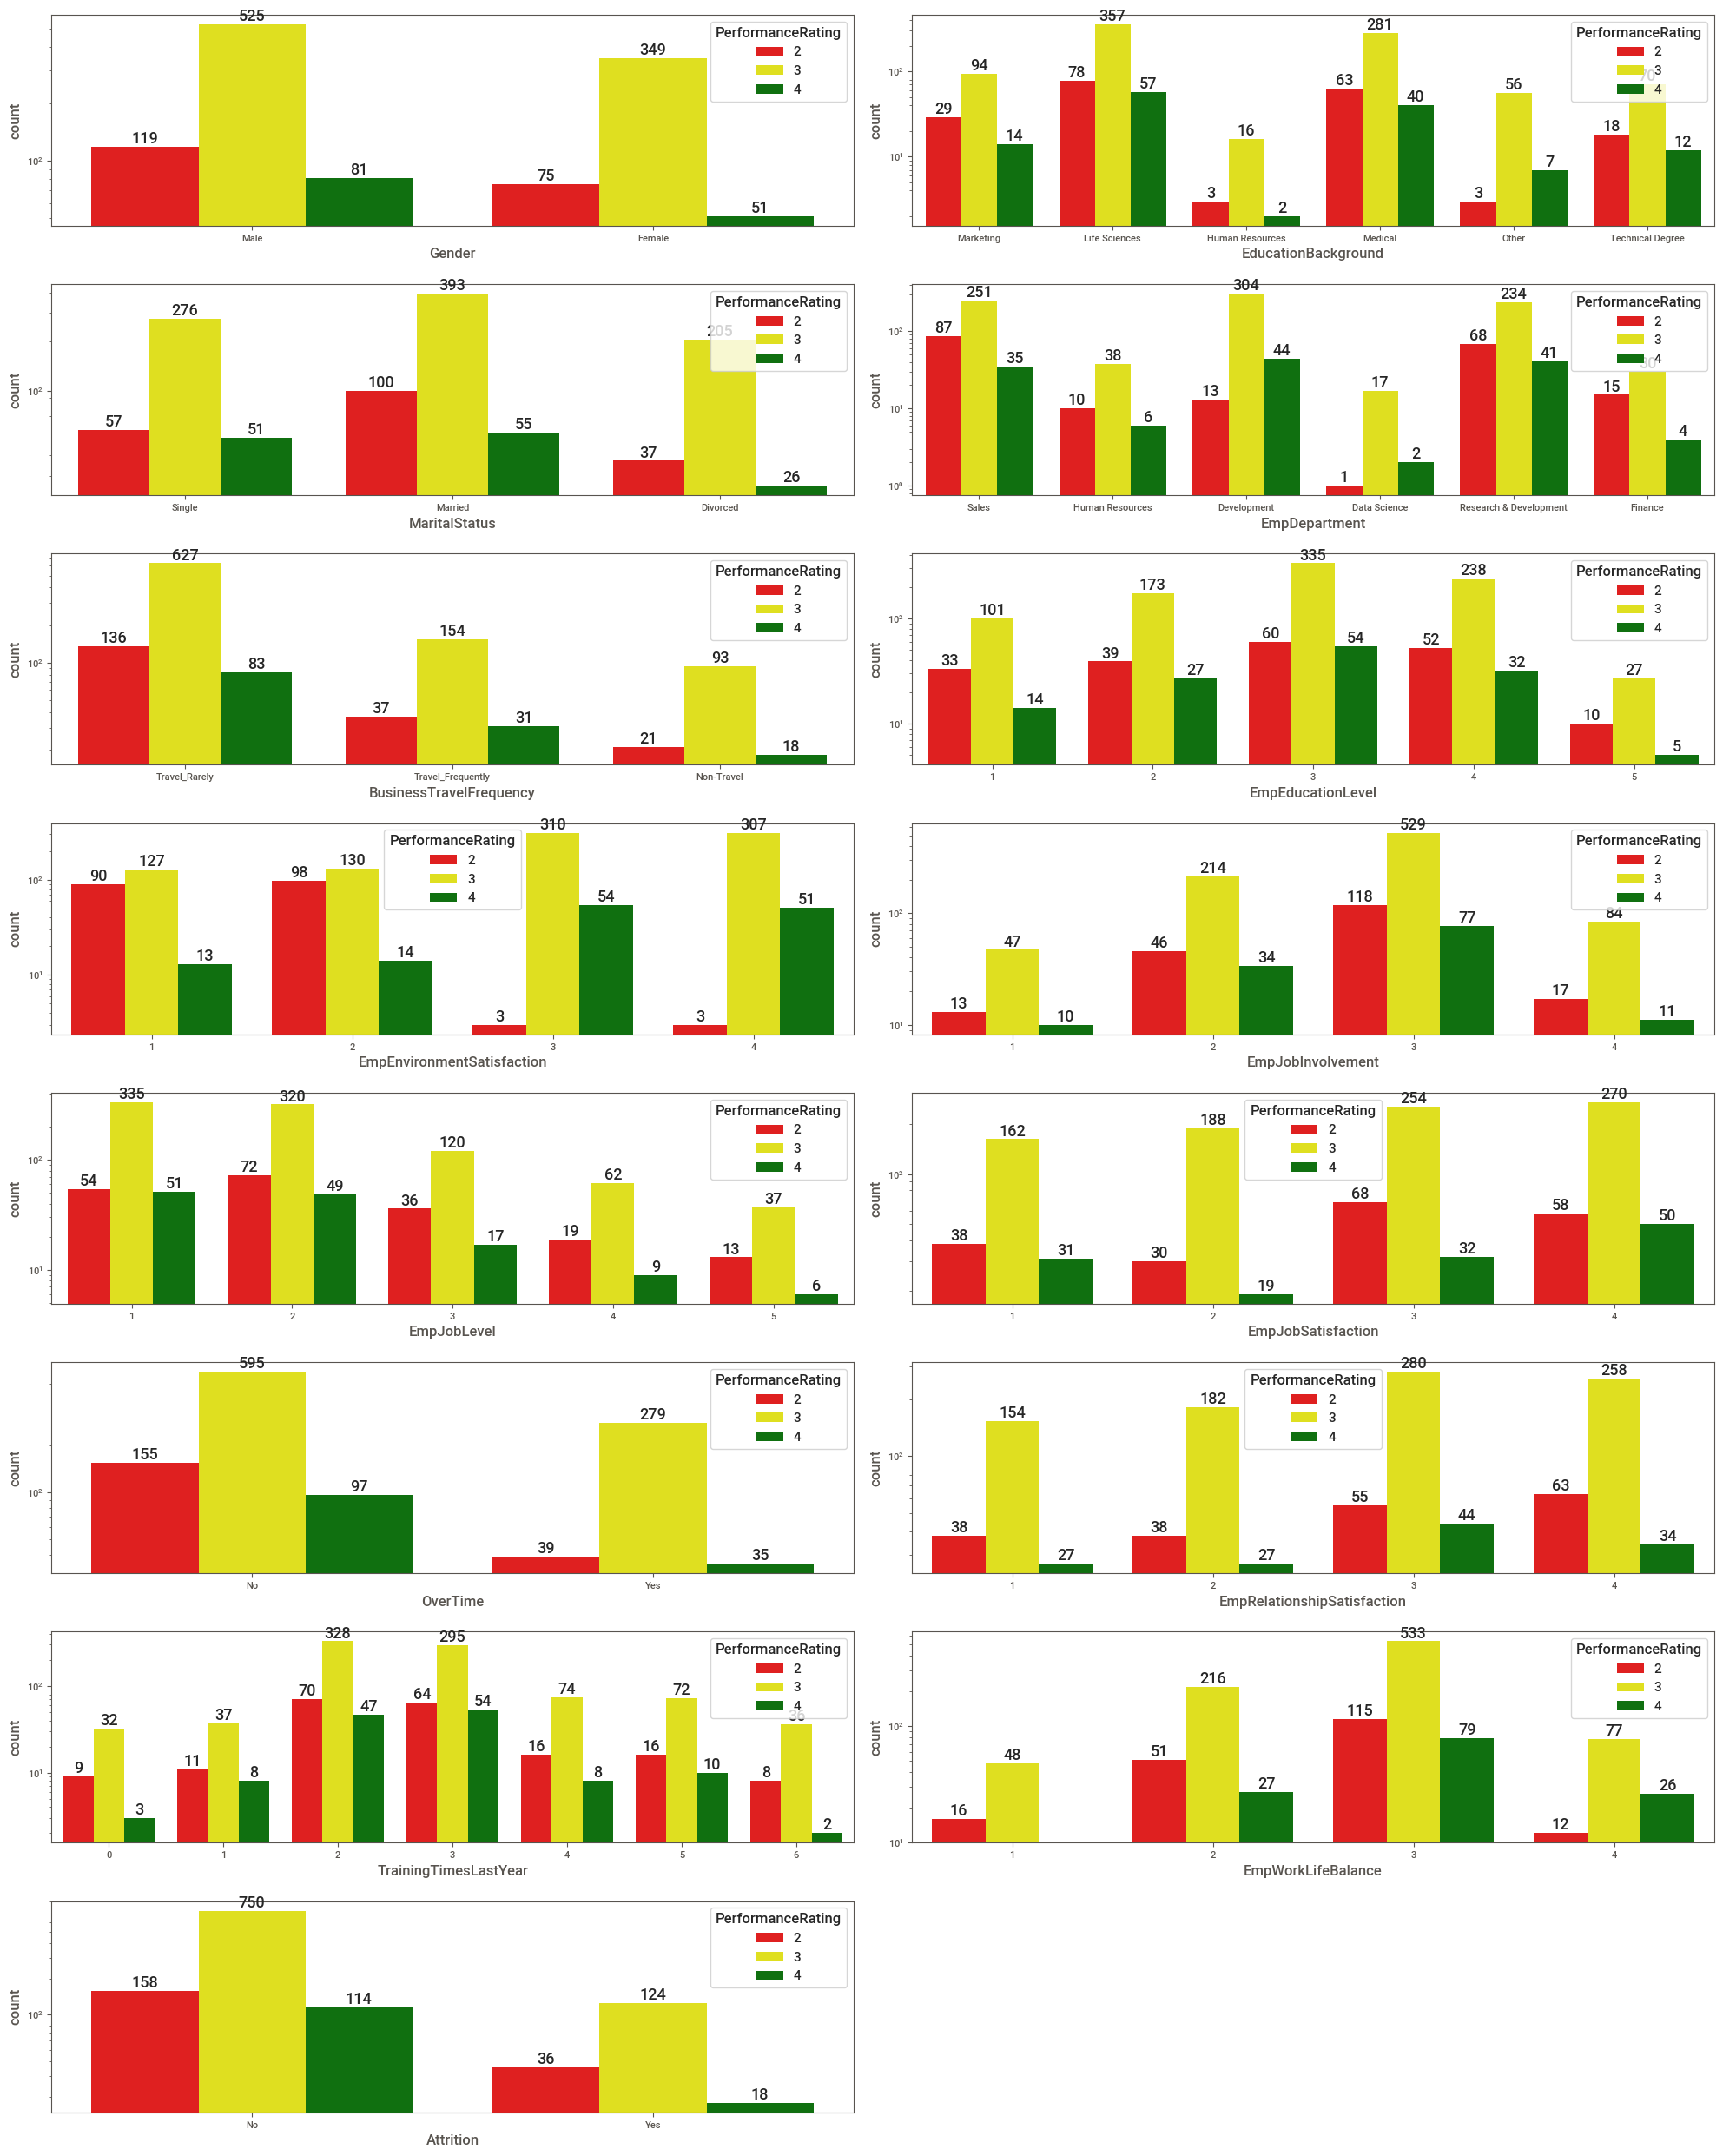

In [14]:
# Plotting countplot to see how the distribution of variables behaves separately with respect to each PerformanceRating
fig = plt.figure(figsize=(20,25))
plotnumb = 1
for col in categorical_features:
    if (col != 'PerformanceRating') & (col != 'EmpNumber') & (col != 'EmpJobRole'):
        ax = plt.subplot(8,2,plotnumb)
        plot = sns.countplot(emp_performance[col],hue=emp_performance.PerformanceRating,palette={2 : 'Red', 3 :'Yellow',4 : 'Green'},log=True)
        for i in range(0,3):plot.bar_label(plot.containers[i], fontsize =13) 
        plotnumb += 1
plt.tight_layout()

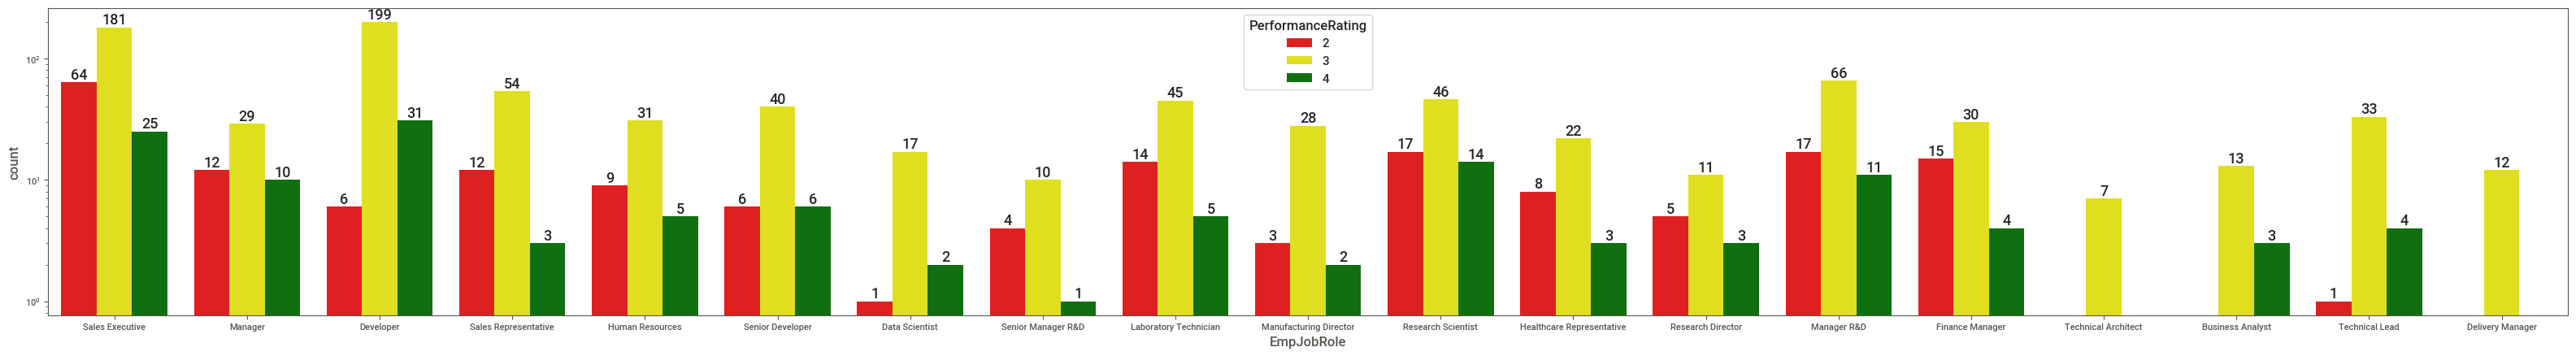

In [15]:
# Plotting EmpJobRole vs PerformanceRating
plt.rcParams["figure.figsize"] = (40,5)
plot = sns.countplot(emp_performance.EmpJobRole,hue=emp_performance.PerformanceRating,palette={2 : 'Red', 3 :'Yellow',4 : 'Green'},log=True)
for i in range(0,3):plot.bar_label(plot.containers[i], fontsize =13) 

In [16]:
# To see the percentages Categorical columns vs PerformanceRating
for col in categorical_features:
    if (col != 'PerformanceRating') & (col != 'EmpNumber'):
        contigency_table = pd.crosstab(emp_performance[col],emp_performance.PerformanceRating,margins=True)['All']
        print(f'{pd.crosstab(emp_performance[col],emp_performance.PerformanceRating).divide(contigency_table,axis=0).dropna()} \n\n')

PerformanceRating         2         3         4
Gender                                         
Female             0.157895  0.734737  0.107368
Male               0.164138  0.724138  0.111724 


PerformanceRating           2         3         4
EducationBackground                              
Human Resources      0.142857  0.761905  0.095238
Life Sciences        0.158537  0.725610  0.115854
Marketing            0.211679  0.686131  0.102190
Medical              0.164062  0.731771  0.104167
Other                0.045455  0.848485  0.106061
Technical Degree     0.180000  0.700000  0.120000 


PerformanceRating         2         3         4
MaritalStatus                                  
Divorced           0.138060  0.764925  0.097015
Married            0.182482  0.717153  0.100365
Single             0.148438  0.718750  0.132812 


PerformanceRating              2         3         4
EmpDepartment                                       
Data Science            0.050000  0.850000  0.100000


***Bivariate Analysis of Categorical Variables vs Performance Rating Observations***

*Visualization using Matplotlib and Seaborn*

* Employees with Marketing educational background performance is not good, when compared to other departments.
* Married employees are not performing better than Single or Divorced employees.
* Employees who are Single is performing better than Married or Divorced employees.
* Finance team performance are not performing well, when compared to other Departments.
* Employees with FinanceManager Job role are not performing well when compared with other employees who are working in other roles.
* Performance of all Business Analysts,Developers and Technical Leads in the company are upto expectation or exceeeding the expectations.
* Employees whose educational level is 1 or 5 are not performing well when compared to other employees.
* Employees with dissatisfaction in environment are not performing well when compared to other employees.
* Employees with high job level is not performing well when compared to low Job level employees.
* Employees working overtime are performing well when compared to employees who don't work overtime.
* When Employees work life balance is low, there will be impact in their performances.

###### Multivariate Analysis

<Figure size 2000x8000 with 0 Axes>

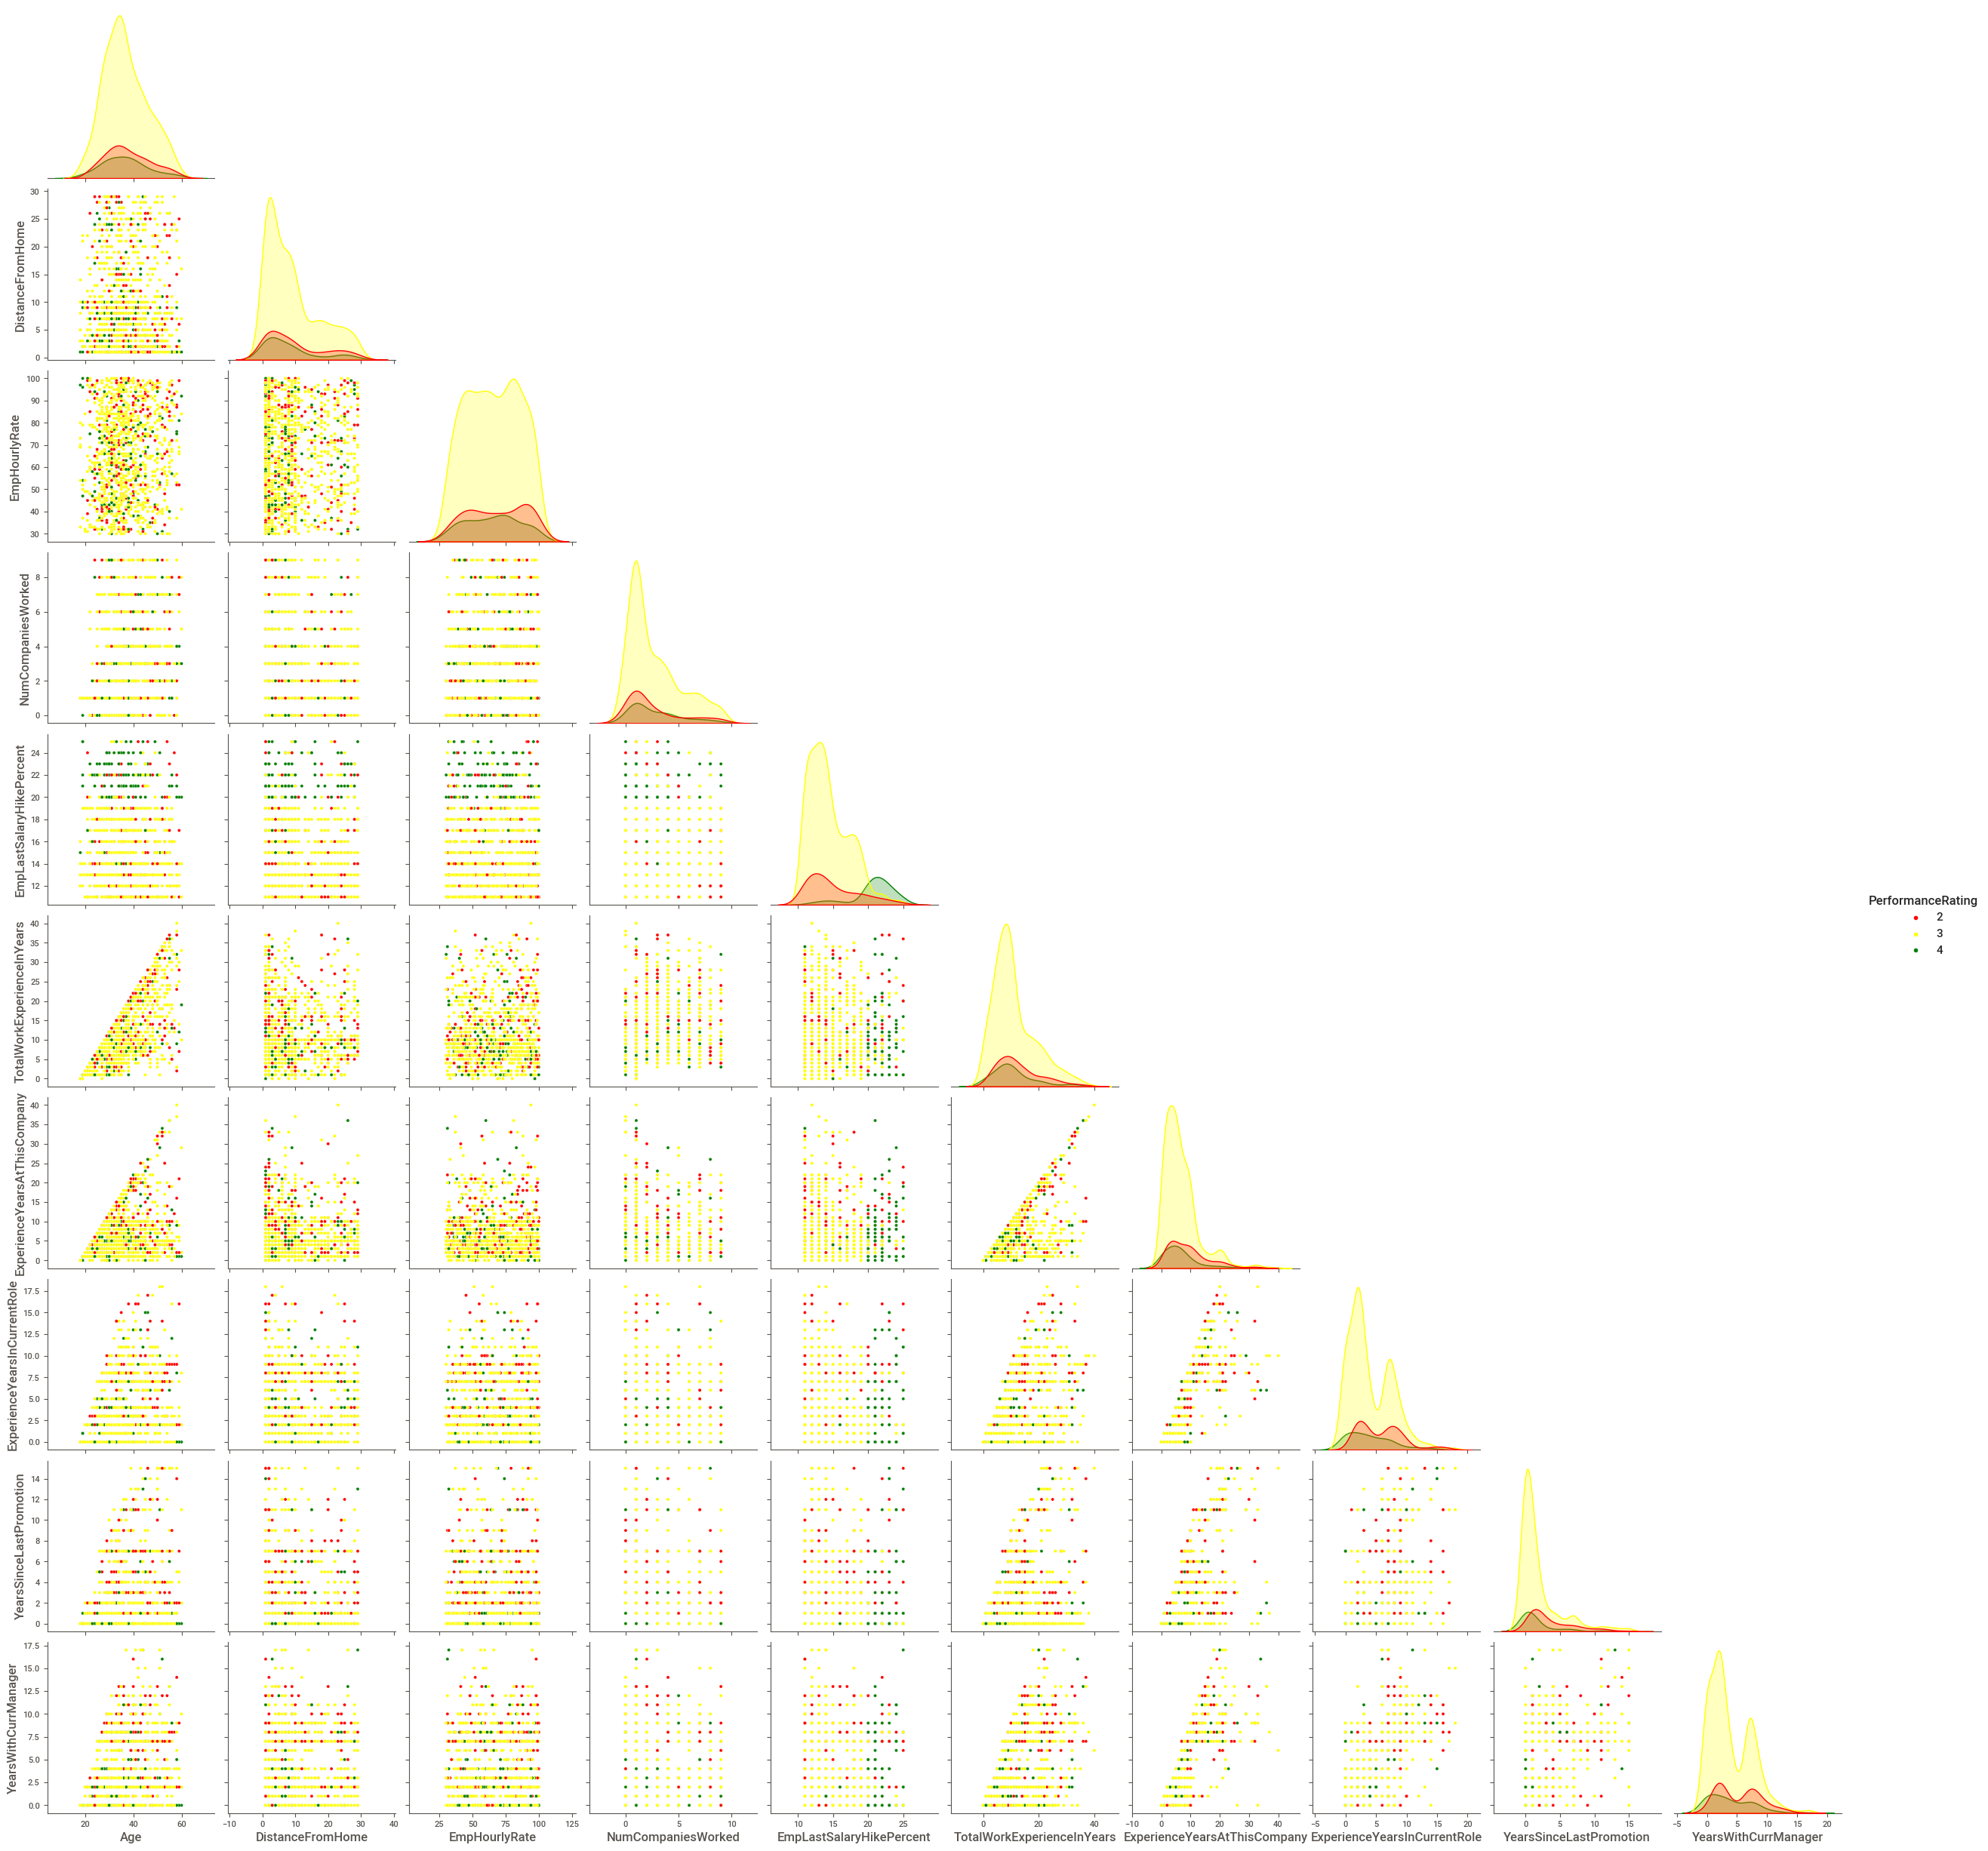

In [17]:
# Creating dataframe with numerical features included with PerformanceRatung column
multivariate_analysis = emp_performance[numerical_features]
multivariate_analysis['PerformanceRating'] = emp_performance.PerformanceRating

fig = plt.figure(figsize=(20,80))
sns.pairplot(multivariate_analysis,hue='PerformanceRating',palette={2 : 'Red', 3 :'Yellow',4 : 'Green'},corner=True)

***Multivariate Analysis Observations***

*Visualization using Matplotlib and Seaborn*

* Employees with less experience and high last salary hike percent, performance is better than other employees.
* Employees with less experience at this company and high last salary hike percent, performance is better than other employees.
* When employees worked on many companies in the past and when the employees are not promoted for past 2 years,employees are not performing well.
* When Employees work with manager for more than 15 years and eventhough if their hourly rate is too low, they perform well.

#### Department-wise performances Analysis

In [33]:
emp_performance.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

<AxesSubplot:ylabel='EmpDepartment'>

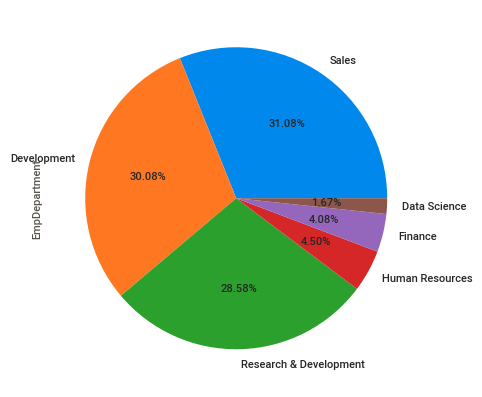

In [18]:
# Plotting pie chart for EmpDepartment feature
plt.rc('font', size=8) 
emp_performance.EmpDepartment.value_counts().plot(kind='pie',autopct = '%0.2f%%')

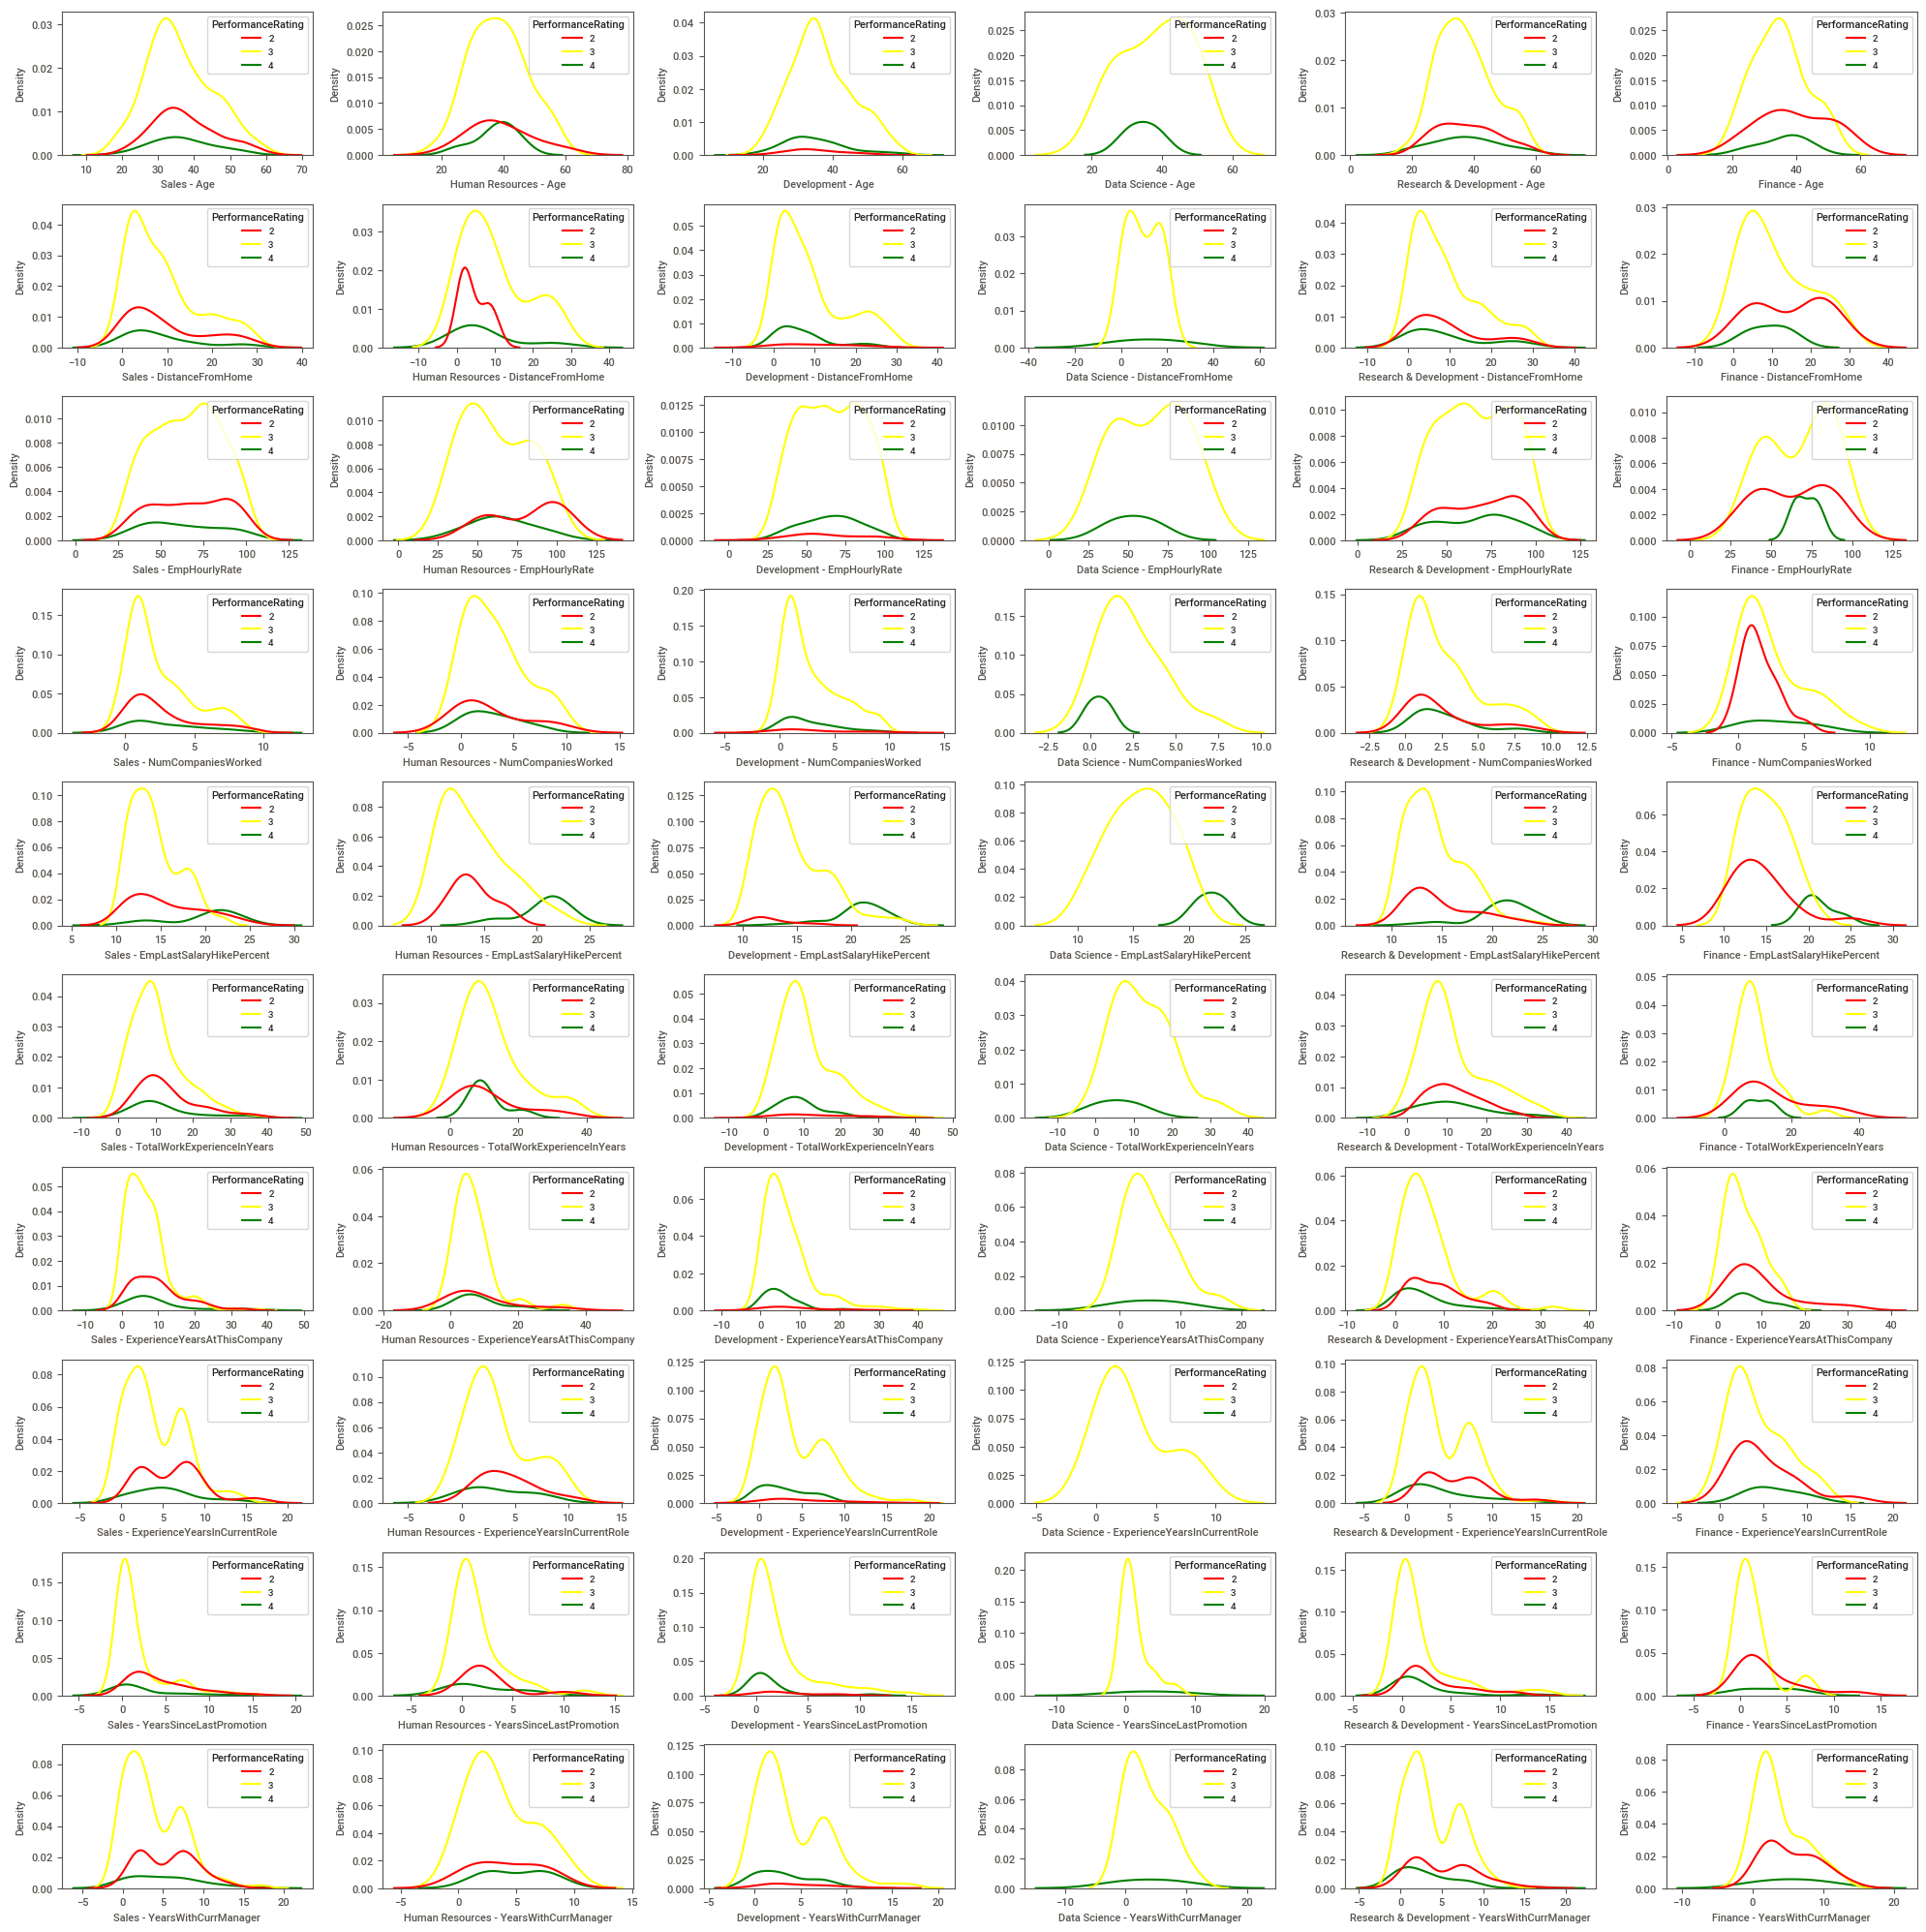

In [19]:
# Plotting kdeplot to see how the distribution of variables behaves separately with respect to each PerformanceRating
plt.rcParams.update({'legend.fontsize': 7,'legend.title_fontsize': 8})
plt.rcParams['legend.loc'] = "upper right"
fig = plt.figure(figsize=(20,20))
plotnumb = 1
for col in numerical_features:
    for dept in emp_performance.EmpDepartment.unique():
        ax = plt.subplot(10,6,plotnumb)
        sns.kdeplot(data=emp_performance[emp_performance.EmpDepartment == dept],x=col,hue='PerformanceRating',palette={2 : 'Red', 3 :'Yellow',4 : 'Green'})
        plt.xlabel(dept + ' - ' + col)
        plotnumb += 1
plt.tight_layout()

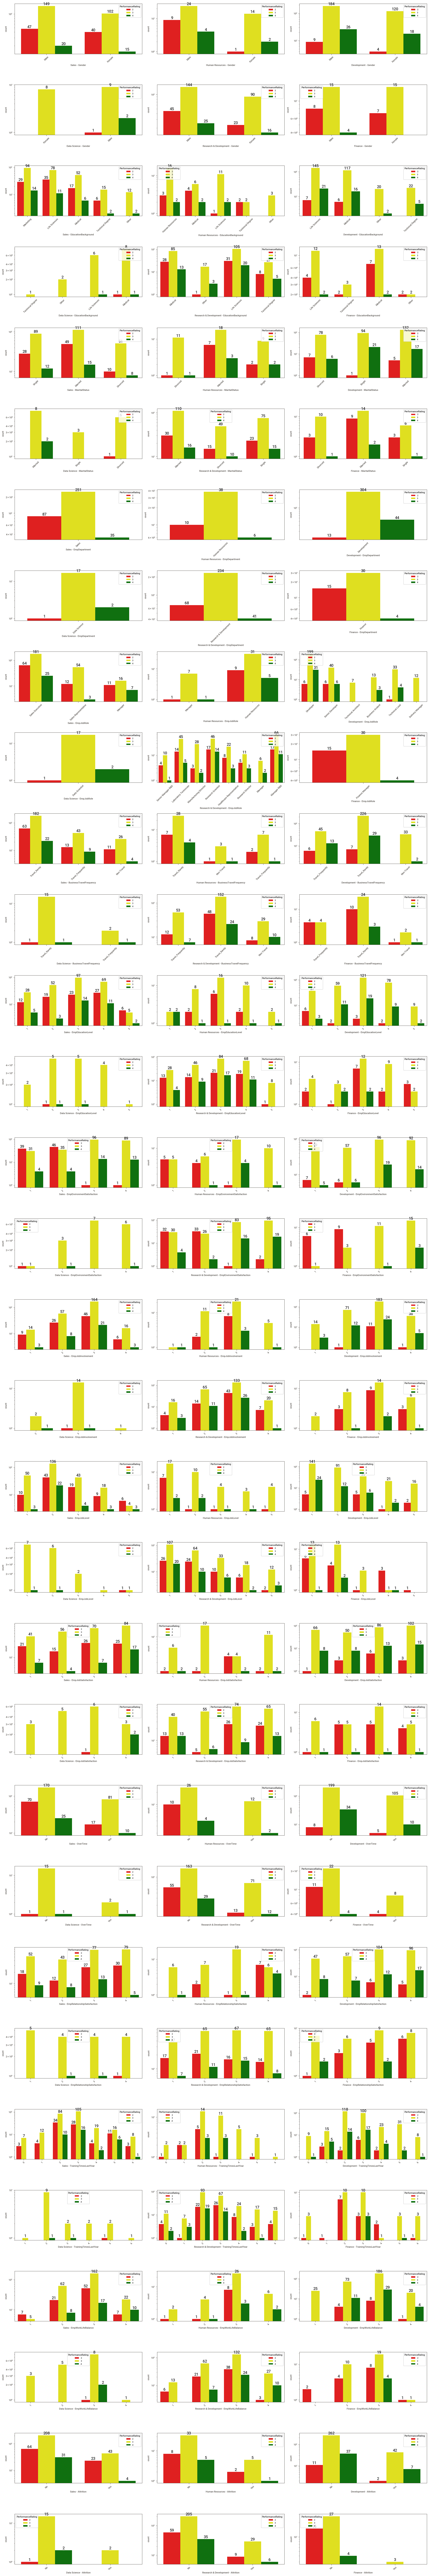

In [20]:
# Plotting countplot to see how the distribution of variables behaves separately with respect to each PerformanceRating
plt.rcParams.update({'legend.fontsize': 7,'legend.title_fontsize': 8})
plt.rcParams['legend.loc'] = "upper right"
fig = plt.figure(figsize=(20,120))
plotnumb = 1
for col in categorical_features:
    for dept in emp_performance.EmpDepartment.unique():
        if (col != 'PerformanceRating') & (col != 'EmpNumber'):
            ax = plt.subplot(32,3,plotnumb)
            plot = sns.countplot(data=emp_performance[emp_performance.EmpDepartment == dept],x=col,\
                                 hue='PerformanceRating',palette={2 : 'Red', 3 :'Yellow',4 : 'Green'},log=True)
            for i in range(0,3):plot.bar_label(plot.containers[i], fontsize =13) 
            plt.xticks(rotation=45)
            plt.xlabel(dept + ' - ' + col)
            plotnumb += 1
plt.tight_layout()

In [21]:
# To see the percentages Categorical columns vs PerformanceRating department wise
for col in categorical_features:
    for dept in emp_performance.EmpDepartment.unique():
        if (col != 'PerformanceRating') & (col != 'EmpNumber'):
            contigency_table = pd.crosstab(emp_performance[emp_performance.EmpDepartment == dept][col],\
                                           emp_performance[emp_performance.EmpDepartment == dept].PerformanceRating,margins=True)['All']
            print('Department - ',dept)
            print(f'{pd.crosstab(emp_performance[emp_performance.EmpDepartment == dept][col],emp_performance[emp_performance.EmpDepartment == dept].PerformanceRating).divide(contigency_table,axis=0).dropna()}\n\n')

Department -  Sales
PerformanceRating         2         3         4
Gender                                         
Female             0.254777  0.649682  0.095541
Male               0.217593  0.689815  0.092593


Department -  Human Resources
PerformanceRating         2         3         4
Gender                                         
Female             0.058824  0.823529  0.117647
Male               0.243243  0.648649  0.108108


Department -  Development
PerformanceRating         2         3         4
Gender                                         
Female             0.028169  0.845070  0.126761
Male               0.041096  0.840183  0.118721


Department -  Data Science
PerformanceRating         2     3         4
Gender                                     
Female             0.000000  1.00  0.000000
Male               0.083333  0.75  0.166667


Department -  Research & Development
PerformanceRating         2         3         4
Gender                                         
Fema

PerformanceRating               2         3         4
BusinessTravelFrequency                              
Non-Travel               0.000000  0.942857  0.057143
Travel_Frequently        0.093750  0.703125  0.203125
Travel_Rarely            0.026718  0.862595  0.110687


Department -  Data Science
PerformanceRating               2         3         4
BusinessTravelFrequency                              
Travel_Frequently        0.000000  0.666667  0.333333
Travel_Rarely            0.058824  0.882353  0.058824


Department -  Research & Development
PerformanceRating               2         3         4
BusinessTravelFrequency                              
Non-Travel               0.170213  0.617021  0.212766
Travel_Frequently        0.166667  0.736111  0.097222
Travel_Rarely            0.214286  0.678571  0.107143


Department -  Finance
PerformanceRating              2         3         4
BusinessTravelFrequency                             
Non-Travel               0.25000  0.500000  0.

Department -  Data Science
PerformanceRating    2         3         4
EmpJobLevel                               
1                  0.0  0.875000  0.125000
2                  0.0  0.857143  0.142857
3                  0.0  1.000000  0.000000
4                  0.0  1.000000  0.000000
5                  0.5  0.500000  0.000000


Department -  Research & Development
PerformanceRating         2         3         4
EmpJobLevel                                    
1                  0.169935  0.699346  0.130719
2                  0.244898  0.653061  0.102041
3                  0.204082  0.673469  0.122449
4                  0.230769  0.692308  0.076923
5                  0.117647  0.705882  0.176471


Department -  Finance
PerformanceRating         2         3         4
EmpJobLevel                                    
1                  0.300000  0.650000  0.050000
2                  0.210526  0.684211  0.105263
3                  0.250000  0.750000  0.000000
4                  0.600000  0.20

PerformanceRating             2         3       4
TrainingTimesLastYear                            
0                      0.250000  0.750000  0.0000
1                      1.000000  0.000000  0.0000
2                      0.411765  0.588235  0.0000
3                      0.187500  0.625000  0.1875
4                      0.666667  0.333333  0.0000
5                      0.000000  0.750000  0.2500
6                      0.250000  0.750000  0.0000


Department -  Sales
PerformanceRating          2         3         4
EmpWorkLifeBalance                              
1                   0.583333  0.416667  0.000000
2                   0.230769  0.681319  0.087912
3                   0.225108  0.701299  0.073593
4                   0.179487  0.564103  0.256410


Department -  Human Resources
PerformanceRating          2         3         4
EmpWorkLifeBalance                              
1                   0.333333  0.666667  0.000000
2                   0.166667  0.666667  0.166667
3     

***Department-wise Performance Observations***

*Visualization using Matplotlib and Seaborn*

* ***Sales - 373 employees (31.08%)***
    * Employees are not performing well when Distance from Home is less than 10 kms.
    * There are employees who performs well than expected but received less than 15% salary hike last time.
    * There are employees received more than 25% salary hike last time eventhough they are underperforming well.
    * There are many employees who are experienced less than 20 years or experienced less than 20 years at this company but not performing well unlike other departments.
    * There are many underperforming employees with their current role less than 10 years.
    * 23.61% employees are underperforming. Male Employees are performing better than female employees.
    * 28% Married employees are underperforming.
    * 32.35% managers are underperforming.
    * 26% employees who don't travel for business purpose are underperforming.
    * 46.15% employees whose EducationLevel is 5 are underperforming.
    * 53.4% employees whose Environment satisfaction are 1 and 2 are underperforming.
    * 31.6% employees whose Job Involvement are 1 and 2 are underperforming.
    * Higher Job level employees are underperforming.
    * Employees with Job level 5 has more top performers as well.
    * 30% employees with Job satisfaction 1 in are underperforming.
    * 26.4% employees who don't work overtime are underperforming.
    * 26.3% employees with EmpRelationshipSatisfaction 4 are underperforming.
    * 22.68% employees with trainings attended 2 or 3 times are underperforming.
    * 18.2% employees with trainings attended 5 times performs well than expected.
    * If employees life work balance is low, then employees will not perform upto expectations.
    * 32.9% employees from the attrition list are underperforming.
    * Employees performance has dropped down as they are not promoted for more than 5 years.
    
    
* ***Development - 361 employees (30.08%)***
    * Development has the low rate of underperforming employees.
    * Employees are not performing well when Distance from Home is less than 10 kms.
    * Employees perform well than expected, if office is less than 10kms distance away from Home.
    * There are Employees who performs well than expected but received less than 15% salary hike last time.
    * Employees received more than 25% salary hike last time eventhough they are underperforming well.
    * Around 84% employees are performing well as expected.
    * All the Business Analysts employees are performing well or performing more than expected.
    * 20% employees who travel frequently for business purpose are performing well than expected.
    * 13% employees whose EducationLevel is 1 are underperforming.
    * 13% employees with trainings attended only 1 times are underperforming.
    * If employees life work balance is high, then employees performs well than expected.
    * Around 4% employees from the attrition list are underperforming.
    * Employees performance has dropped down as they are not promoted for more than 5 years.
    
    
* ***Research & Development - 343 employees (28.58%)***
	* Employees are not performing well when Distance from Home is less than 10 kms.
	* There are many number of underperforming employees who worked more than 5 companies in their career.
	* There are employees who performs well than expected but received less than 15% salary hike last time.
	* Employees received more than 25% salary hike last time eventhough they are underperforming well.
	* 19.42% employees are underperforming.
	* 26.7% Senior Manager R&D and 26.3% Research Director are underperforming.
	* All the managers are performing well or performing more than expected.
	* 21.28% employees who don't travel for business purpose are performing well than expected.
	* 28.9% employees with EducationLevel is 1 are underperforming.
	* 51.29% employees with Environment satisfaction are 1 or 2 are underperforming. 
	* 23.14% employees with Job Involvement are 3 or 4 are underperforming.
	* Employees with Job level 5 has more number of top performers.
	* 23.69% employees with Job satisfaction 3 or 4 are underperforming.
	* 22.26% employees who don't work overtime are underperforming.
	* 27.9% employees with EmpRelationshipSatisfaction 1 are underperforming.
	* 27.3% employees with trainings attended only 1 times performs well than expected.
	* 20.4% employees with trainings attended 2 or 3 times are underperforming.
	* If employees life work balance is high, then employees performs well than expected.
	* 20.5% employees from the attrition list in Research & Development department are underperforming.
    * Employees performance has dropped down as they are not promoted for more than 5 years.
    
    
* ***Human Resources - 54 employees (4.5%)***
	* Employees are not performing well when Distance from Home is less than 10 kms.
	* There are employees who performs well than expected but received less than 15% salary hike last time.
	* There are many underperforming employees with their current role less than 10 years.
	* Around 80% female employees are performing well as expected. 
	* 24.32% male employees are underperforming.
	* 25% married employees are underperforming.
	* 20% employees who don't travel for business purpose are performing well than expected.
	* 26% employees with EducationLevel 3 are underperforming.
	* 43.2% employees with Environment satisfaction are 1 or 2 are underperforming.
	* 20% employees with Job satisfaction 1 are underperforming.
	* 25% employees who don't work overtime are underperforming.
	* 41.2% employees with EmpRelationshipSatisfaction 4 are underperforming and 23.5% employees performing well than expected
	* 22.7% employees with trainings attended 2 times in Human Resources department are underperforming.
	* 20% employees with trainings attended 3 times in Human Resources department performs well than expected.
	* If employees life work balance is low, then employees will not perform upto expectations.
	* 25% employees from the attrition list are underperforming.
    * Employees performance has dropped down as they are not promoted for more than 5 years.
    
    
* ***Finance - 49 employees (4.08%)***
	* Finance Department employees are not performing well when compared to other Departments.
	* Employees with FinanceManager Job role are not performing well when compared with other employees who are working in other roles.
	* There are more number of underperforming employees in Finance Department.
	* Employees are not performing well irrespective to Distance from Home.
	* There are employees who performs well than expected if hourly rate paid to employee is between 50 and 90.
	* Employees received more than 25% salary hike last time eventhough they are underperforming well.
	* There are many underperforming employees with their current role less than 10 years.
	* 30.72% Finance Department employees are underperforming.
	* 36% married employees are underperforming.
	* 80.36% employees with Environment satisfaction 1 or 2 are underperforming. 
	* 25% employees with EmpJobLevel 3 are underperforming.
	* 28.97% employees with Job satisfaction 1 or 2 are underperforming.
	* 29.7% employees who don't work overtime are underperforming.
	* 40% employees with EmpRelationshipSatisfaction 4 are underperforming.
	* 29.5% employees with trainings attended 2 or 3 times are underperforming.
	* If employees life work balance is low, then employees will not perform upto expectations.
    * Employees performance has dropped down as they are not promoted for more than 5 years.
    
    
* ***Data Science - 20 employees (1.67%)***
    * Data Science department has only single job role "Data Scientist".
    * There are no Non-travel employees and only 15% employees travel frequently.
    * 75% employees working in Job Level 1 or 2.
    * 85% employees don't work overtime.
    * 95% employees attended trainings atleast 2 times last year.
	* Only 1 underperforming employee in Data Science Department and education level of that employee is low but employee Job level is high. He attended 5 trainings last year.
	* Employees with PerformanceRating 4 are aged between 20 and 50, where other departments have the best performing employees ranged between 20 and 60.
    * More than 50% of employees are from Medical educational background and the underperforming employee is from Medical educational background.
	* All the employees who are performing well than expected have worked less than 3 companies in their career.